# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/wj/CarND-Term1/Project_2/train.p'
testing_file = '/home/wj/CarND-Term1/Project_2/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

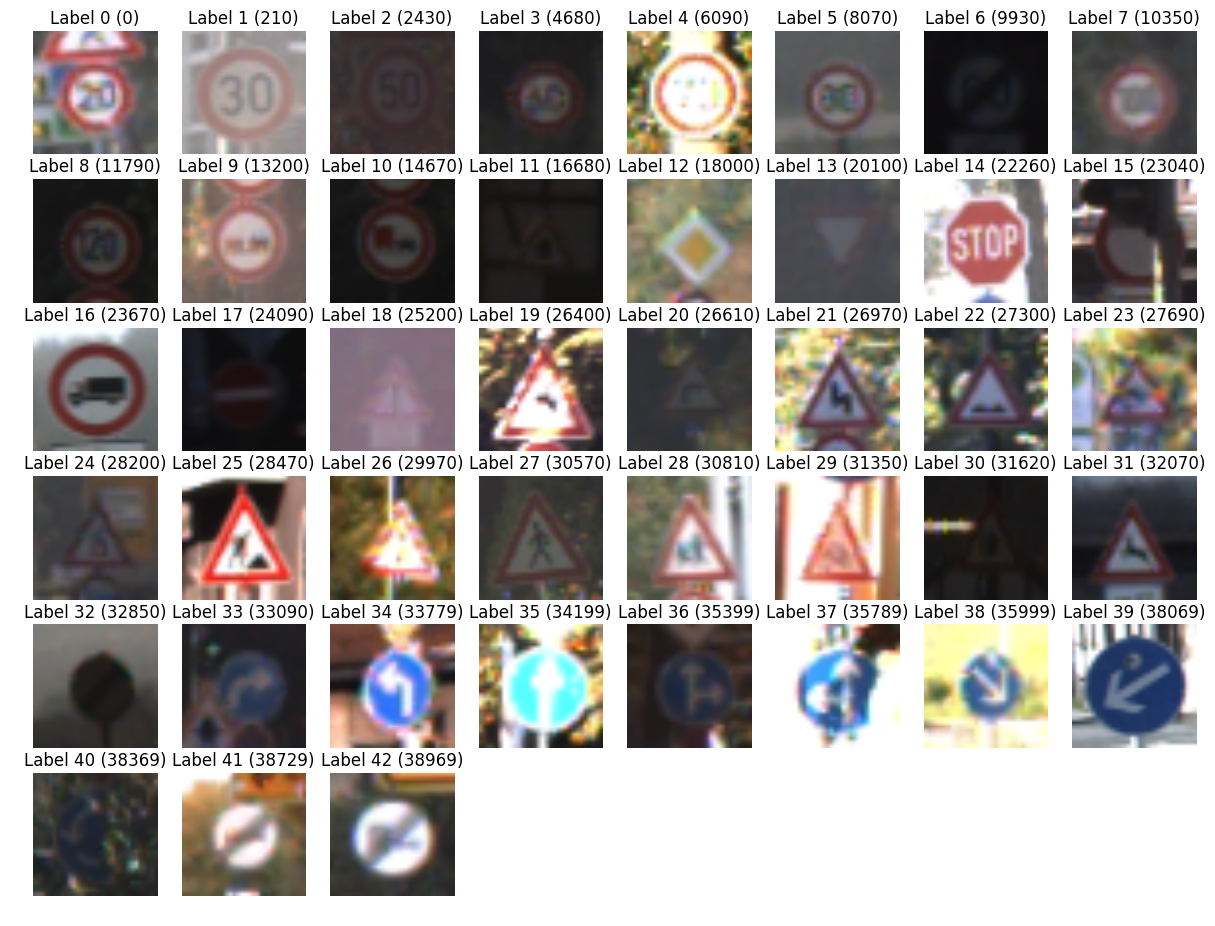

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(15, 15))
p = 1
for i in range(n_classes):
    index = np.argwhere(y_train == i)[0].squeeze()
    
    image = X_train[index]
    plt.subplot(8, 8, p)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(i, index))
    p += 1
    _ = plt.imshow(image)
plt.show()

Number of training data


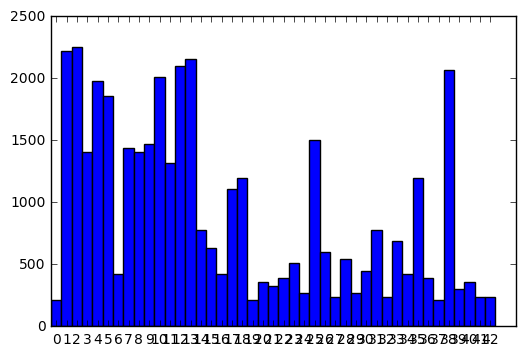

In [5]:
from collections import Counter

ctr = Counter(sorted(y_train))
print('Number of training data')
labels, values = zip(*(ctr.items()))

indexes = np.arange(len(labels))
width =1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2 as cv


def adj_norm(train):
    nor_img = np.copy(train)
    nor_img = np.array([cv.normalize(train[i], nor_img[i], alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F) 
                        for i in range(len(train))], dtype=np.float32)

    return nor_img


train_feature, test_feature = adj_norm(X_train), adj_norm(X_test)

Train feature:  13
Test feature:  41


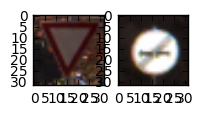

In [7]:
# Test image output
import random
%matplotlib inline
plt.figure(figsize=(2, 2))

index = random.randint(0, len(train_feature))
image = train_feature[index].squeeze()

plt.subplot(1, 2, 1)
plt.imshow(image)
print("Train feature: ", y_train[index])

index_ = random.randint(0, len(test_feature))
image_ = test_feature[index_].squeeze()

plt.subplot(1, 2, 2)
plt.imshow(image_)
print("Test feature: ", y_test[index_])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**


By making the histogram equal, the contrast was improved and the gamma was adjusted to make the image more clear. 
Pre-processing was done to make learning easier, and shuffle was used to prevent overfitting.

In [8]:
import random
from tqdm import tqdm

# Copy the train features to the new train set
train_feature_applying = np.copy(train_feature)
y_train_applying = np.copy(y_train)

print("Before Transformation")
print("train_feature shape:", train_feature_applying.shape)
print("y_train shape: ", y_train_applying.shape, "\n")

for i in range(n_classes):
    count = len(y_train_applying[y_train_applying == i])
    print("Number of Class", i, ":", count)

Before Transformation
train_feature shape: (39209, 32, 32, 3)
y_train shape:  (39209,) 

Number of Class 0 : 210
Number of Class 1 : 2220
Number of Class 2 : 2250
Number of Class 3 : 1410
Number of Class 4 : 1980
Number of Class 5 : 1860
Number of Class 6 : 420
Number of Class 7 : 1440
Number of Class 8 : 1410
Number of Class 9 : 1470
Number of Class 10 : 2010
Number of Class 11 : 1320
Number of Class 12 : 2100
Number of Class 13 : 2160
Number of Class 14 : 780
Number of Class 15 : 630
Number of Class 16 : 420
Number of Class 17 : 1110
Number of Class 18 : 1200
Number of Class 19 : 210
Number of Class 20 : 360
Number of Class 21 : 330
Number of Class 22 : 390
Number of Class 23 : 510
Number of Class 24 : 270
Number of Class 25 : 1500
Number of Class 26 : 600
Number of Class 27 : 240
Number of Class 28 : 540
Number of Class 29 : 270
Number of Class 30 : 450
Number of Class 31 : 780
Number of Class 32 : 240
Number of Class 33 : 689
Number of Class 34 : 420
Number of Class 35 : 1200
Numbe

In [9]:
# Applying rotate to each class image
def rotated_img(img):
    row, col, ch = image.shape
    
    rotation = np.random.uniform(-15, 15)
    rotation = cv.getRotationMatrix2D((col/2, row/2), rotation, 1)
    img = cv.warpAffine(img, rotation, (col, row), None, flags=cv.INTER_LINEAR)

    return img


# Applying affine transformation to each class image
def affine_img(img):
    row, col, ch = image.shape
    
    pts1 = np.float32([[5, 5], [20, 5], [5, 20]])
    p1 = 2*np.random.uniform()
    p2 = 2*np.random.uniform()
    pts2 = np.float32([[5-p1, 5+p2], [20, 5], [5-p1, 20+p2]])
    
    dst = cv.getAffineTransform(pts1, pts2)
    img = cv.warpAffine(img, dst, (col, row), None, flags=cv.INTER_LINEAR)
    
    return img

Train feature rotated:  41
Train feature affine:  5


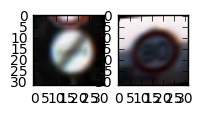

In [10]:
# Test image output
import random
%matplotlib inline

plt.figure(figsize=(2, 2))

index = random.randint(0, len(train_feature))
image = train_feature[index].squeeze()

plt.subplot(1, 2, 1)
plt.imshow(rotated_img(image))
print("Train feature rotated: ", y_train[index])

index_ = random.randint(0, len(train_feature))
image_ = train_feature[index_].squeeze()

plt.subplot(1, 2, 2)
plt.imshow(affine_img(image_))
print("Train feature affine: ", y_train[index_])

In [11]:
# Progress bar
pbar = tqdm(range(n_classes), desc='Progress', unit='class')    

cls_start = 0
for i in pbar:
    cls_range = len(y_train_applying[y_train_applying == i])
    loop_count = int(cls_range * 0.1)
    
    for j in range(loop_count):
        rand = int(random.randrange(cls_start, cls_start + cls_range))  
        image = train_feature_applying[rand]
              
        rotated = rotated_img(image)
        affine = affine_img(image)
        
        train_feature_applying = np.append(train_feature_applying, [rotated], axis=0)
        train_feature_applying = np.append(train_feature_applying, [affine], axis=0)
        
        y_train_applying = np.append(y_train_applying, [i], axis=0)
        y_train_applying = np.append(y_train_applying, [i], axis=0)
        
    cls_start += cls_range

print("\nAfter Transformation")
print("train_feature shape:", train_feature_applying.shape)
print("y_train shape:", y_train_applying.shape)

Progress:   0%|          | 0/43 [00:00<?, ?class/s]

Progress:   2%|▏         | 1/43 [00:02<01:55,  2.76s/class]

Progress:   5%|▍         | 2/43 [00:31<07:10, 10.49s/class]

Progress:   7%|▋         | 3/43 [01:00<10:46, 16.16s/class]

Progress:   9%|▉         | 4/43 [01:19<10:59, 16.91s/class]

Progress:  12%|█▏        | 5/43 [01:45<12:29, 19.73s/class]

Progress:  14%|█▍        | 6/43 [02:10<13:02, 21.15s/class]

Progress:  16%|█▋        | 7/43 [02:15<09:53, 16.49s/class]

Progress:  19%|█▊        | 8/43 [02:34<10:03, 17.25s/class]

Progress:  21%|██        | 9/43 [02:53<10:04, 17.78s/class]

Progress:  23%|██▎       | 10/43 [03:14<10:10, 18.51s/class]

Progress:  26%|██▌       | 11/43 [03:41<11:21, 21.28s/class]

Progress:  28%|██▊       | 12/43 [04:00<10:32, 20.40s/class]

Progress:  30%|███       | 13/43 [04:29<11:33, 23.13s/class]

Progress:  33%|███▎      | 14/43 [04:59<12:10, 25.20s/class]

Progress:  35%|███▍      | 15/43 [05:10<09:45, 20.91s/class]

Progress:  37%|███▋      | 16/43 [05:19<07:46, 17.29s/class]

Progress:  40%|███▉      | 17/43 [05:25<06:01, 13.91s/class]

Progress:  42%|████▏     | 18/43 [05:41<06:03, 14.53s/class]

Progress:  44%|████▍     | 19/43 [05:58<06:09, 15.41s/class]

Progress:  47%|████▋     | 20/43 [06:01<04:29, 11.72s/class]

Progress:  49%|████▉     | 21/43 [06:07<03:34,  9.74s/class]

Progress:  51%|█████     | 22/43 [06:11<02:52,  8.23s/class]

Progress:  53%|█████▎    | 23/43 [06:17<02:28,  7.43s/class]

Progress:  56%|█████▌    | 24/43 [06:24<02:21,  7.43s/class]

Progress:  58%|█████▊    | 25/43 [06:28<01:55,  6.39s/class]

Progress:  60%|██████    | 26/43 [06:50<03:08, 11.10s/class]

Progress:  63%|██████▎   | 27/43 [06:59<02:46, 10.44s/class]

Progress:  65%|██████▌   | 28/43 [07:03<02:05,  8.38s/class]

Progress:  67%|██████▋   | 29/43 [07:11<01:55,  8.27s/class]

Progress:  70%|██████▉   | 30/43 [07:15<01:30,  6.98s/class]

Progress:  72%|███████▏  | 31/43 [07:21<01:22,  6.90s/class]

Progress:  74%|███████▍  | 32/43 [07:33<01:31,  8.35s/class]

Progress:  77%|███████▋  | 33/43 [07:37<01:09,  6.93s/class]

Progress:  79%|███████▉  | 34/43 [07:47<01:11,  7.96s/class]

Progress:  81%|████████▏ | 35/43 [07:54<00:59,  7.49s/class]

Progress:  84%|████████▎ | 36/43 [08:12<01:15, 10.74s/class]

Progress:  86%|████████▌ | 37/43 [08:18<00:55,  9.29s/class]

Progress:  88%|████████▊ | 38/43 [08:21<00:37,  7.45s/class]

Progress:  91%|█████████ | 39/43 [08:52<00:58, 14.63s/class]

Progress:  93%|█████████▎| 40/43 [08:57<00:34, 11.61s/class]

Progress:  95%|█████████▌| 41/43 [09:02<00:19,  9.78s/class]

Progress:  98%|█████████▊| 42/43 [09:06<00:07,  7.95s/class]

Progress: 100%|██████████| 43/43 [09:10<00:00,  6.66s/class]


After Transformation
train_feature shape: (47049, 32, 32, 3)
y_train shape: (47049,)


28


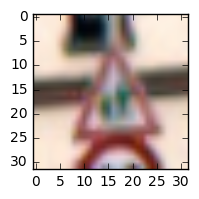

In [13]:
# Test image output
import random
%matplotlib inline

index = random.randint(0, len(train_feature_applying))
image = train_feature_applying[index].squeeze()

plt.figure(figsize=(2, 2))
plt.imshow(image)
print(y_train_applying[index])

In [1]:
import os.path
import pickle

# Save the data using python pickle
pickle_file = 'trafficSigns_regen.p'
if not os.path.isfile(pickle_file):
    print('Saving data')
    try:
        with open('trafficSigns_regen.p', 'wb') as pfile:
            pickle.dump(
                {
                    'train_feature': train_feature_applying,
                    'train_label': y_train_applying,
                    'X_test': test_feature,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Error : ', e)
        raise

print('Data save in successfully')

Data save in successfully


In [1]:
import pickle
import numpy as np
pickle_file = 'trafficSigns_regen.p'

with open(pickle_file, 'rb') as f:
    data = pickle.load(f)
    train_feature = data['train_feature']
    train_label = data['train_label']
    X_test_ = data['X_test']
    y_test_ = data['y_test']
    
    del data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle


train_feature, valid_feature, train_label, valid_label = train_test_split(train_feature, train_label, test_size=.1, 
                                                                          random_state=832289)


print('Data loaded.')
print("train_feature shape:", train_feature.shape)
print("train_label shape:", train_label.shape)
print("X_test shape:", X_test_.shape)
print("y_test shape:", y_test_.shape)

print("Image shape:", train_feature[0].shape)
print("Number of test:", X_test_.shape[0])

Data loaded.
train_feature shape: (42344, 32, 32, 3)
train_label shape: (42344,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)
Image shape: (32, 32, 3)
Number of test: 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


Additional data was generated by rotating the image by 30 degrees and applying affine. Data was created by adding 10% of each class and saved as a separate file using pickles from python.
The reason for creating additional data is that it is possible to learn more robustly due to the data of various environments as well as the reason to prevent overfitting.

In [33]:
import tensorflow as tf
from tqdm import tqdm

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100

# X, Y
X = tf.placeholder(tf.float32, (None, 32, 32, 3))
Y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(Y, 43)

# Weights
W1 = tf.Variable(tf.random_normal([3, 3, 3, 32], stddev=0.01))      # 3x3x3 conv, 32 outputs
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))     # 3x3x32 conv, 64 outputs
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))    # 3x3x32 conv, 128 outputs
W4 = tf.Variable(tf.random_normal([2048, 625], stddev=0.01))        # FC 128 * 4 * 4 inputs, 625 outputs
W5 = tf.Variable(tf.random_normal([625, 43], stddev=0.01))          # FC 625 inputs, 43 outputs (labels)

# Construct model
dropout_cnn_rate = tf.placeholder(tf.float32)
dropout_fcc_rate = tf.placeholder(tf.float32)
X_image = tf.reshape(X, [-1, 32, 32, 3])

l1a = tf.nn.relu(tf.nn.conv2d(X_image, W1, strides=[1, 1, 1, 1], padding='SAME'))
print(l1a)  # l1a shape=(?, 32, 32, 32)
l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(l1)  # l1 shape=(?, 16, 16, 32)
l1 = tf.nn.dropout(l1, dropout_cnn_rate)

l2a = tf.nn.relu(tf.nn.conv2d(l1, W2, strides=[1, 1, 1, 1], padding='SAME'))
print(l2a)  # l2a shape=(?, 16, 16, 64)
l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(l2)  # l2 shape=(?, 8, 8, 64)
l2 = tf.nn.dropout(l2, dropout_cnn_rate)

l3a = tf.nn.relu(tf.nn.conv2d(l2, W3, strides=[1, 1, 1, 1], padding='SAME'))
print(l3a)  # l3a shape=(?, 8, 8, 128)
l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(l3)  # l3 shape=(?, 4, 4, 128)
l3 = tf.reshape(l3, [-1, W4.get_shape().as_list()[0]])
print(l3)  # reshape to (?, 2048)
l3 = tf.nn.dropout(l3, dropout_cnn_rate)

l4 = tf.nn.relu(tf.matmul(l3, W4))
l4 = tf.nn.dropout(l4, dropout_fcc_rate)

hypothesis = tf.matmul(l4, W5)

# Minimize error using cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, one_hot_y))

# Gradient Descent
optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, Y: batch_y, dropout_cnn_rate: 1, 
                                                           dropout_fcc_rate: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Tensor("Relu_40:0", shape=(?, 32, 32, 32), dtype=float32)
Tensor("MaxPool_29:0", shape=(?, 16, 16, 32), dtype=float32)
Tensor("Relu_41:0", shape=(?, 16, 16, 64), dtype=float32)
Tensor("MaxPool_30:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("Relu_42:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("MaxPool_31:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_48:0", shape=(?, 2048), dtype=float32)


In [34]:
# Launch the graph
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    num_examples = len(train_feature)
    
    # Training cycle
    for epoch in range(training_epochs):
        X_train, y_train = shuffle(train_feature, train_label)
        batch_pbar = tqdm(range(0, num_examples, batch_size), desc='Epoch {:>2}/{}'.format(epoch+1, training_epochs), unit='batches')
 
        for offset in batch_pbar:
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y, dropout_cnn_rate: 0.7, dropout_fcc_rate: 0.5})
        
        validation_accuracy = evaluate(valid_feature, valid_label)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'LinearConnected')
    print("Model saved")

Epoch  1/20:   0%|          | 0/424 [00:00<?, ?batches/s]

Epoch  1/20:   2%|▏         | 10/424 [00:00<00:04, 92.77batches/s]

Epoch  1/20:   5%|▌         | 22/424 [00:00<00:04, 99.12batches/s]

Epoch  1/20:   8%|▊         | 34/424 [00:00<00:03, 102.62batches/s]

Epoch  1/20:  11%|█         | 46/424 [00:00<00:03, 106.33batches/s]

Epoch  1/20:  14%|█▎        | 58/424 [00:00<00:03, 108.66batches/s]

Epoch  1/20:  16%|█▋        | 69/424 [00:00<00:03, 108.68batches/s]

Epoch  1/20:  19%|█▉        | 81/424 [00:00<00:03, 110.44batches/s]

Epoch  1/20:  22%|██▏       | 93/424 [00:00<00:02, 110.79batches/s]

Epoch  1/20:  25%|██▍       | 105/424 [00:00<00:02, 111.67batches/s]

Epoch  1/20:  28%|██▊       | 117/424 [00:01<00:02, 112.50batches/s]

Epoch  1/20:  30%|███       | 129/424 [00:01<00:02, 112.46batches/s]

Epoch  1/20:  33%|███▎      | 141/424 [00:01<00:02, 113.19batches/s]

Epoch  1/20:  36%|███▌      | 153/424 [00:01<00:02, 113.75batches/s]

Epoch  1/20:  39%|███▉      | 165/424 [00:01<00:02, 114.39batches/s]

Epoch  1/20:  42%|████▏     | 177/424 [00:01<00:02, 114.34batches/s]

Epoch  1/20:  45%|████▍     | 189/424 [00:01<00:02, 114.81batches/s]

Epoch  1/20:  47%|████▋     | 201/424 [00:01<00:01, 115.52batches/s]

Epoch  1/20:  50%|█████     | 214/424 [00:01<00:01, 117.20batches/s]

Epoch  1/20:  54%|█████▎    | 227/424 [00:01<00:01, 119.42batches/s]

Epoch  1/20:  56%|█████▋    | 239/424 [00:02<00:01, 119.40batches/s]

Epoch  1/20:  59%|█████▉    | 251/424 [00:02<00:01, 118.48batches/s]

Epoch  1/20:  62%|██████▏   | 263/424 [00:02<00:01, 118.87batches/s]

Epoch  1/20:  65%|██████▍   | 275/424 [00:02<00:01, 118.85batches/s]

Epoch  1/20:  68%|██████▊   | 287/424 [00:02<00:01, 118.52batches/s]

Epoch  1/20:  71%|███████   | 299/424 [00:02<00:01, 118.75batches/s]

Epoch  1/20:  73%|███████▎  | 311/424 [00:02<00:00, 118.76batches/s]

Epoch  1/20:  76%|███████▌  | 323/424 [00:02<00:00, 117.82batches/s]

Epoch  1/20:  79%|███████▉  | 335/424 [00:02<00:00, 118.19batches/s]

Epoch  1/20:  82%|████████▏ | 347/424 [00:03<00:00, 117.87batches/s]

Epoch  1/20:  85%|████████▍ | 359/424 [00:03<00:00, 117.75batches/s]

Epoch  1/20:  88%|████████▊ | 371/424 [00:03<00:00, 114.49batches/s]

Epoch  1/20:  90%|█████████ | 383/424 [00:03<00:00, 111.20batches/s]

Epoch  1/20:  93%|█████████▎| 395/424 [00:03<00:00, 110.57batches/s]

Epoch  1/20:  96%|█████████▌| 407/424 [00:03<00:00, 109.93batches/s]

Epoch  1/20:  99%|█████████▉| 419/424 [00:03<00:00, 111.39batches/s]

Epoch  1/20: 100%|██████████| 424/424 [00:03<00:00, 114.53batches/s]

Epoch  2/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 1 ...
Validation Accuracy = 0.414



Epoch  2/20:   3%|▎         | 13/424 [00:00<00:03, 121.10batches/s]

Epoch  2/20:   6%|▌         | 25/424 [00:00<00:03, 120.71batches/s]

Epoch  2/20:   9%|▉         | 38/424 [00:00<00:03, 120.98batches/s]

Epoch  2/20:  12%|█▏        | 51/424 [00:00<00:03, 121.44batches/s]

Epoch  2/20:  15%|█▌        | 64/424 [00:00<00:02, 121.47batches/s]

Epoch  2/20:  18%|█▊        | 77/424 [00:00<00:02, 122.22batches/s]

Epoch  2/20:  21%|██        | 90/424 [00:00<00:02, 122.00batches/s]

Epoch  2/20:  24%|██▍       | 102/424 [00:00<00:02, 120.32batches/s]

Epoch  2/20:  27%|██▋       | 114/424 [00:00<00:02, 119.81batches/s]

Epoch  2/20:  30%|██▉       | 126/424 [00:01<00:02, 119.42batches/s]

Epoch  2/20:  33%|███▎      | 138/424 [00:01<00:02, 118.91batches/s]

Epoch  2/20:  35%|███▌      | 150/424 [00:01<00:02, 118.58batches/s]

Epoch  2/20:  38%|███▊      | 162/424 [00:01<00:02, 117.79batches/s]

Epoch  2/20:  41%|████      | 174/424 [00:01<00:02, 118.05batches/s]

Epoch  2/20:  44%|████▍     | 186/424 [00:01<00:02, 117.91batches/s]

Epoch  2/20:  47%|████▋     | 198/424 [00:01<00:01, 117.63batches/s]

Epoch  2/20:  50%|████▉     | 210/424 [00:01<00:01, 116.52batches/s]

Epoch  2/20:  52%|█████▏    | 222/424 [00:01<00:01, 115.16batches/s]

Epoch  2/20:  55%|█████▌    | 234/424 [00:01<00:01, 115.10batches/s]

Epoch  2/20:  58%|█████▊    | 246/424 [00:02<00:01, 114.70batches/s]

Epoch  2/20:  61%|██████    | 258/424 [00:02<00:01, 114.60batches/s]

Epoch  2/20:  64%|██████▎   | 270/424 [00:02<00:01, 114.33batches/s]

Epoch  2/20:  67%|██████▋   | 282/424 [00:02<00:01, 114.11batches/s]

Epoch  2/20:  69%|██████▉   | 294/424 [00:02<00:01, 114.30batches/s]

Epoch  2/20:  72%|███████▏  | 306/424 [00:02<00:01, 114.36batches/s]

Epoch  2/20:  75%|███████▌  | 318/424 [00:02<00:00, 114.34batches/s]

Epoch  2/20:  78%|███████▊  | 330/424 [00:02<00:00, 113.75batches/s]

Epoch  2/20:  81%|████████  | 342/424 [00:02<00:00, 113.97batches/s]

Epoch  2/20:  83%|████████▎ | 354/424 [00:03<00:00, 113.21batches/s]

Epoch  2/20:  87%|████████▋ | 367/424 [00:03<00:00, 116.86batches/s]

Epoch  2/20:  90%|████████▉ | 380/424 [00:03<00:00, 119.98batches/s]

Epoch  2/20:  93%|█████████▎| 393/424 [00:03<00:00, 121.93batches/s]

Epoch  2/20:  96%|█████████▌| 406/424 [00:03<00:00, 123.41batches/s]

Epoch  2/20:  99%|█████████▉| 419/424 [00:03<00:00, 124.26batches/s]

Epoch  2/20: 100%|██████████| 424/424 [00:03<00:00, 118.37batches/s]

Epoch  3/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 2 ...
Validation Accuracy = 0.846



Epoch  3/20:   3%|▎         | 13/424 [00:00<00:03, 121.04batches/s]

Epoch  3/20:   6%|▌         | 26/424 [00:00<00:03, 123.10batches/s]

Epoch  3/20:   9%|▉         | 39/424 [00:00<00:03, 124.55batches/s]

Epoch  3/20:  12%|█▏        | 52/424 [00:00<00:02, 124.65batches/s]

Epoch  3/20:  15%|█▌        | 64/424 [00:00<00:02, 122.95batches/s]

Epoch  3/20:  18%|█▊        | 77/424 [00:00<00:02, 122.29batches/s]

Epoch  3/20:  21%|██        | 89/424 [00:00<00:02, 119.50batches/s]

Epoch  3/20:  24%|██▍       | 101/424 [00:00<00:02, 117.61batches/s]

Epoch  3/20:  27%|██▋       | 113/424 [00:00<00:02, 114.66batches/s]

Epoch  3/20:  30%|██▉       | 126/424 [00:01<00:02, 117.89batches/s]

Epoch  3/20:  33%|███▎      | 139/424 [00:01<00:02, 119.65batches/s]

Epoch  3/20:  36%|███▌      | 152/424 [00:01<00:02, 120.36batches/s]

Epoch  3/20:  39%|███▉      | 165/424 [00:01<00:02, 120.90batches/s]

Epoch  3/20:  42%|████▏     | 178/424 [00:01<00:02, 121.41batches/s]

Epoch  3/20:  45%|████▌     | 191/424 [00:01<00:01, 121.31batches/s]

Epoch  3/20:  48%|████▊     | 204/424 [00:01<00:01, 121.03batches/s]

Epoch  3/20:  51%|█████     | 217/424 [00:01<00:01, 120.71batches/s]

Epoch  3/20:  54%|█████▍    | 230/424 [00:01<00:01, 119.79batches/s]

Epoch  3/20:  57%|█████▋    | 242/424 [00:02<00:01, 118.03batches/s]

Epoch  3/20:  60%|█████▉    | 254/424 [00:02<00:01, 117.38batches/s]

Epoch  3/20:  63%|██████▎   | 267/424 [00:02<00:01, 118.57batches/s]

Epoch  3/20:  66%|██████▌   | 280/424 [00:02<00:01, 119.48batches/s]

Epoch  3/20:  69%|██████▉   | 292/424 [00:02<00:01, 119.03batches/s]

Epoch  3/20:  72%|███████▏  | 304/424 [00:02<00:01, 116.89batches/s]

Epoch  3/20:  75%|███████▍  | 317/424 [00:02<00:00, 118.33batches/s]

Epoch  3/20:  78%|███████▊  | 330/424 [00:02<00:00, 119.18batches/s]

Epoch  3/20:  81%|████████  | 342/424 [00:02<00:00, 118.17batches/s]

Epoch  3/20:  83%|████████▎ | 354/424 [00:02<00:00, 116.50batches/s]

Epoch  3/20:  86%|████████▋ | 366/424 [00:03<00:00, 114.68batches/s]

Epoch  3/20:  89%|████████▉ | 379/424 [00:03<00:00, 116.68batches/s]

Epoch  3/20:  92%|█████████▏| 392/424 [00:03<00:00, 118.72batches/s]

Epoch  3/20:  95%|█████████▌| 404/424 [00:03<00:00, 119.01batches/s]

Epoch  3/20:  98%|█████████▊| 417/424 [00:03<00:00, 119.45batches/s]

Epoch  3/20: 100%|██████████| 424/424 [00:03<00:00, 119.44batches/s]

Epoch  4/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 3 ...
Validation Accuracy = 0.933



Epoch  4/20:   3%|▎         | 13/424 [00:00<00:03, 119.66batches/s]

Epoch  4/20:   6%|▌         | 26/424 [00:00<00:03, 121.12batches/s]

Epoch  4/20:   9%|▉         | 39/424 [00:00<00:03, 123.41batches/s]

Epoch  4/20:  12%|█▏        | 52/424 [00:00<00:02, 124.53batches/s]

Epoch  4/20:  15%|█▌        | 65/424 [00:00<00:02, 123.74batches/s]

Epoch  4/20:  18%|█▊        | 77/424 [00:00<00:02, 119.78batches/s]

Epoch  4/20:  21%|██        | 88/424 [00:00<00:02, 115.98batches/s]

Epoch  4/20:  24%|██▎       | 100/424 [00:00<00:02, 114.30batches/s]

Epoch  4/20:  26%|██▌       | 111/424 [00:00<00:02, 112.85batches/s]

Epoch  4/20:  29%|██▉       | 123/424 [00:01<00:02, 112.20batches/s]

Epoch  4/20:  32%|███▏      | 135/424 [00:01<00:02, 111.80batches/s]

Epoch  4/20:  34%|███▍      | 146/424 [00:01<00:02, 110.34batches/s]

Epoch  4/20:  37%|███▋      | 158/424 [00:01<00:02, 110.44batches/s]

Epoch  4/20:  40%|███▉      | 169/424 [00:01<00:02, 110.19batches/s]

Epoch  4/20:  42%|████▏     | 180/424 [00:01<00:02, 109.80batches/s]

Epoch  4/20:  45%|████▌     | 192/424 [00:01<00:02, 110.25batches/s]

Epoch  4/20:  48%|████▊     | 203/424 [00:01<00:02, 110.10batches/s]

Epoch  4/20:  50%|█████     | 214/424 [00:01<00:01, 109.78batches/s]

Epoch  4/20:  53%|█████▎    | 226/424 [00:01<00:01, 109.94batches/s]

Epoch  4/20:  56%|█████▌    | 237/424 [00:02<00:01, 109.51batches/s]

Epoch  4/20:  58%|█████▊    | 248/424 [00:02<00:01, 109.47batches/s]

Epoch  4/20:  61%|██████▏   | 260/424 [00:02<00:01, 109.92batches/s]

Epoch  4/20:  64%|██████▍   | 271/424 [00:02<00:01, 108.63batches/s]

Epoch  4/20:  67%|██████▋   | 283/424 [00:02<00:01, 109.60batches/s]

Epoch  4/20:  69%|██████▉   | 294/424 [00:02<00:01, 109.46batches/s]

Epoch  4/20:  72%|███████▏  | 305/424 [00:02<00:01, 109.40batches/s]

Epoch  4/20:  75%|███████▍  | 317/424 [00:02<00:00, 109.77batches/s]

Epoch  4/20:  77%|███████▋  | 328/424 [00:02<00:00, 109.33batches/s]

Epoch  4/20:  80%|████████  | 340/424 [00:03<00:00, 109.76batches/s]

Epoch  4/20:  83%|████████▎ | 352/424 [00:03<00:00, 109.93batches/s]

Epoch  4/20:  86%|████████▌ | 363/424 [00:03<00:00, 109.53batches/s]

Epoch  4/20:  88%|████████▊ | 374/424 [00:03<00:00, 109.41batches/s]

Epoch  4/20:  91%|█████████ | 386/424 [00:03<00:00, 109.82batches/s]

Epoch  4/20:  94%|█████████▎| 397/424 [00:03<00:00, 109.81batches/s]

Epoch  4/20:  96%|█████████▋| 409/424 [00:03<00:00, 112.14batches/s]

Epoch  4/20:  99%|█████████▉| 421/424 [00:03<00:00, 113.60batches/s]

Epoch  4/20: 100%|██████████| 424/424 [00:03<00:00, 112.20batches/s]

Epoch  5/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 4 ...
Validation Accuracy = 0.959



Epoch  5/20:   3%|▎         | 12/424 [00:00<00:03, 119.73batches/s]

Epoch  5/20:   6%|▌         | 25/424 [00:00<00:03, 121.75batches/s]

Epoch  5/20:   9%|▉         | 38/424 [00:00<00:03, 121.87batches/s]

Epoch  5/20:  12%|█▏        | 50/424 [00:00<00:03, 120.14batches/s]

Epoch  5/20:  15%|█▍        | 62/424 [00:00<00:03, 118.58batches/s]

Epoch  5/20:  17%|█▋        | 74/424 [00:00<00:02, 117.43batches/s]

Epoch  5/20:  20%|██        | 86/424 [00:00<00:02, 116.80batches/s]

Epoch  5/20:  23%|██▎       | 98/424 [00:00<00:02, 116.12batches/s]

Epoch  5/20:  26%|██▌       | 110/424 [00:00<00:02, 115.49batches/s]

Epoch  5/20:  29%|██▉       | 122/424 [00:01<00:02, 115.27batches/s]

Epoch  5/20:  32%|███▏      | 134/424 [00:01<00:02, 114.45batches/s]

Epoch  5/20:  34%|███▍      | 146/424 [00:01<00:02, 114.80batches/s]

Epoch  5/20:  37%|███▋      | 158/424 [00:01<00:02, 114.31batches/s]

Epoch  5/20:  40%|████      | 170/424 [00:01<00:02, 114.53batches/s]

Epoch  5/20:  43%|████▎     | 182/424 [00:01<00:02, 113.20batches/s]

Epoch  5/20:  46%|████▌     | 194/424 [00:01<00:02, 112.16batches/s]

Epoch  5/20:  49%|████▊     | 206/424 [00:01<00:01, 111.35batches/s]

Epoch  5/20:  51%|█████▏    | 218/424 [00:01<00:01, 111.47batches/s]

Epoch  5/20:  54%|█████▍    | 230/424 [00:02<00:01, 111.23batches/s]

Epoch  5/20:  57%|█████▋    | 242/424 [00:02<00:01, 109.86batches/s]

Epoch  5/20:  60%|█████▉    | 253/424 [00:02<00:01, 109.52batches/s]

Epoch  5/20:  62%|██████▏   | 264/424 [00:02<00:01, 109.27batches/s]

Epoch  5/20:  65%|██████▌   | 276/424 [00:02<00:01, 109.85batches/s]

Epoch  5/20:  68%|██████▊   | 287/424 [00:02<00:01, 109.64batches/s]

Epoch  5/20:  70%|███████   | 298/424 [00:02<00:01, 109.73batches/s]

Epoch  5/20:  73%|███████▎  | 309/424 [00:02<00:01, 109.59batches/s]

Epoch  5/20:  75%|███████▌  | 320/424 [00:02<00:00, 109.33batches/s]

Epoch  5/20:  78%|███████▊  | 332/424 [00:02<00:00, 109.77batches/s]

Epoch  5/20:  81%|████████  | 343/424 [00:03<00:00, 109.64batches/s]

Epoch  5/20:  83%|████████▎ | 354/424 [00:03<00:00, 109.36batches/s]

Epoch  5/20:  86%|████████▋ | 366/424 [00:03<00:00, 109.84batches/s]

Epoch  5/20:  89%|████████▉ | 377/424 [00:03<00:00, 109.22batches/s]

Epoch  5/20:  92%|█████████▏| 389/424 [00:03<00:00, 109.94batches/s]

Epoch  5/20:  95%|█████████▍| 401/424 [00:03<00:00, 110.15batches/s]

Epoch  5/20:  97%|█████████▋| 413/424 [00:03<00:00, 110.52batches/s]

Epoch  5/20: 100%|██████████| 424/424 [00:03<00:00, 112.72batches/s]

Epoch  6/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 5 ...
Validation Accuracy = 0.977



Epoch  6/20:   3%|▎         | 13/424 [00:00<00:03, 124.12batches/s]

Epoch  6/20:   6%|▌         | 26/424 [00:00<00:03, 124.65batches/s]

Epoch  6/20:   9%|▉         | 39/424 [00:00<00:03, 124.76batches/s]

Epoch  6/20:  12%|█▏        | 52/424 [00:00<00:02, 124.06batches/s]

Epoch  6/20:  15%|█▌        | 64/424 [00:00<00:03, 119.69batches/s]

Epoch  6/20:  18%|█▊        | 75/424 [00:00<00:03, 116.31batches/s]

Epoch  6/20:  21%|██        | 87/424 [00:00<00:02, 116.88batches/s]

Epoch  6/20:  23%|██▎       | 99/424 [00:00<00:02, 117.00batches/s]

Epoch  6/20:  26%|██▌       | 111/424 [00:00<00:02, 117.54batches/s]

Epoch  6/20:  29%|██▉       | 123/424 [00:01<00:02, 117.53batches/s]

Epoch  6/20:  32%|███▏      | 135/424 [00:01<00:02, 117.31batches/s]

Epoch  6/20:  35%|███▍      | 147/424 [00:01<00:02, 117.45batches/s]

Epoch  6/20:  38%|███▊      | 159/424 [00:01<00:02, 117.93batches/s]

Epoch  6/20:  41%|████      | 172/424 [00:01<00:02, 120.16batches/s]

Epoch  6/20:  44%|████▎     | 185/424 [00:01<00:01, 121.74batches/s]

Epoch  6/20:  47%|████▋     | 198/424 [00:01<00:01, 120.10batches/s]

Epoch  6/20:  50%|████▉     | 210/424 [00:01<00:01, 116.99batches/s]

Epoch  6/20:  52%|█████▏    | 222/424 [00:01<00:01, 114.86batches/s]

Epoch  6/20:  55%|█████▌    | 234/424 [00:01<00:01, 113.09batches/s]

Epoch  6/20:  58%|█████▊    | 246/424 [00:02<00:01, 112.55batches/s]

Epoch  6/20:  61%|██████    | 258/424 [00:02<00:01, 111.94batches/s]

Epoch  6/20:  64%|██████▎   | 270/424 [00:02<00:01, 111.46batches/s]

Epoch  6/20:  67%|██████▋   | 282/424 [00:02<00:01, 111.40batches/s]

Epoch  6/20:  69%|██████▉   | 294/424 [00:02<00:01, 110.77batches/s]

Epoch  6/20:  72%|███████▏  | 306/424 [00:02<00:01, 110.73batches/s]

Epoch  6/20:  75%|███████▌  | 318/424 [00:02<00:00, 110.42batches/s]

Epoch  6/20:  78%|███████▊  | 330/424 [00:02<00:00, 110.37batches/s]

Epoch  6/20:  81%|████████  | 342/424 [00:02<00:00, 110.80batches/s]

Epoch  6/20:  83%|████████▎ | 354/424 [00:03<00:00, 110.81batches/s]

Epoch  6/20:  86%|████████▋ | 366/424 [00:03<00:00, 110.10batches/s]

Epoch  6/20:  89%|████████▉ | 378/424 [00:03<00:00, 110.16batches/s]

Epoch  6/20:  92%|█████████▏| 390/424 [00:03<00:00, 111.30batches/s]

Epoch  6/20:  95%|█████████▌| 403/424 [00:03<00:00, 115.53batches/s]

Epoch  6/20:  98%|█████████▊| 416/424 [00:03<00:00, 118.46batches/s]

Epoch  6/20: 100%|██████████| 424/424 [00:03<00:00, 115.64batches/s]

Epoch  7/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 6 ...
Validation Accuracy = 0.988



Epoch  7/20:   3%|▎         | 13/424 [00:00<00:03, 121.34batches/s]

Epoch  7/20:   6%|▌         | 26/424 [00:00<00:03, 122.73batches/s]

Epoch  7/20:   9%|▉         | 39/424 [00:00<00:03, 123.06batches/s]

Epoch  7/20:  12%|█▏        | 52/424 [00:00<00:03, 122.39batches/s]

Epoch  7/20:  15%|█▌        | 64/424 [00:00<00:02, 121.62batches/s]

Epoch  7/20:  18%|█▊        | 76/424 [00:00<00:02, 120.89batches/s]

Epoch  7/20:  21%|██        | 88/424 [00:00<00:02, 120.58batches/s]

Epoch  7/20:  24%|██▎       | 100/424 [00:00<00:02, 119.60batches/s]

Epoch  7/20:  26%|██▋       | 112/424 [00:00<00:02, 117.65batches/s]

Epoch  7/20:  29%|██▉       | 124/424 [00:01<00:02, 117.16batches/s]

Epoch  7/20:  32%|███▏      | 136/424 [00:01<00:02, 116.72batches/s]

Epoch  7/20:  35%|███▍      | 148/424 [00:01<00:02, 116.03batches/s]

Epoch  7/20:  38%|███▊      | 160/424 [00:01<00:02, 115.66batches/s]

Epoch  7/20:  41%|████      | 172/424 [00:01<00:02, 115.52batches/s]

Epoch  7/20:  43%|████▎     | 184/424 [00:01<00:02, 115.61batches/s]

Epoch  7/20:  46%|████▌     | 196/424 [00:01<00:01, 115.49batches/s]

Epoch  7/20:  49%|████▉     | 208/424 [00:01<00:01, 114.52batches/s]

Epoch  7/20:  52%|█████▏    | 220/424 [00:01<00:01, 114.71batches/s]

Epoch  7/20:  55%|█████▍    | 232/424 [00:01<00:01, 114.92batches/s]

Epoch  7/20:  58%|█████▊    | 244/424 [00:02<00:01, 114.85batches/s]

Epoch  7/20:  60%|██████    | 256/424 [00:02<00:01, 115.15batches/s]

Epoch  7/20:  63%|██████▎   | 268/424 [00:02<00:01, 115.27batches/s]

Epoch  7/20:  66%|██████▌   | 280/424 [00:02<00:01, 115.22batches/s]

Epoch  7/20:  69%|██████▉   | 292/424 [00:02<00:01, 113.83batches/s]

Epoch  7/20:  72%|███████▏  | 304/424 [00:02<00:01, 113.90batches/s]

Epoch  7/20:  75%|███████▍  | 316/424 [00:02<00:00, 114.45batches/s]

Epoch  7/20:  77%|███████▋  | 328/424 [00:02<00:00, 114.65batches/s]

Epoch  7/20:  80%|████████  | 340/424 [00:02<00:00, 114.53batches/s]

Epoch  7/20:  83%|████████▎ | 352/424 [00:03<00:00, 114.35batches/s]

Epoch  7/20:  86%|████████▌ | 364/424 [00:03<00:00, 115.23batches/s]

Epoch  7/20:  89%|████████▊ | 376/424 [00:03<00:00, 115.03batches/s]

Epoch  7/20:  92%|█████████▏| 388/424 [00:03<00:00, 115.16batches/s]

Epoch  7/20:  94%|█████████▍| 400/424 [00:03<00:00, 114.91batches/s]

Epoch  7/20:  97%|█████████▋| 412/424 [00:03<00:00, 113.44batches/s]

Epoch  7/20: 100%|██████████| 424/424 [00:03<00:00, 115.01batches/s]

Epoch  8/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 7 ...
Validation Accuracy = 0.989



Epoch  8/20:   3%|▎         | 13/424 [00:00<00:03, 119.30batches/s]

Epoch  8/20:   6%|▌         | 26/424 [00:00<00:03, 122.02batches/s]

Epoch  8/20:   9%|▉         | 39/424 [00:00<00:03, 122.68batches/s]

Epoch  8/20:  12%|█▏        | 52/424 [00:00<00:03, 123.20batches/s]

Epoch  8/20:  15%|█▌        | 65/424 [00:00<00:02, 122.58batches/s]

Epoch  8/20:  18%|█▊        | 77/424 [00:00<00:02, 119.87batches/s]

Epoch  8/20:  21%|██        | 89/424 [00:00<00:02, 118.96batches/s]

Epoch  8/20:  24%|██▍       | 101/424 [00:00<00:02, 117.57batches/s]

Epoch  8/20:  27%|██▋       | 113/424 [00:00<00:02, 116.82batches/s]

Epoch  8/20:  29%|██▉       | 125/424 [00:01<00:02, 115.34batches/s]

Epoch  8/20:  32%|███▏      | 137/424 [00:01<00:02, 114.28batches/s]

Epoch  8/20:  35%|███▌      | 149/424 [00:01<00:02, 114.95batches/s]

Epoch  8/20:  38%|███▊      | 161/424 [00:01<00:02, 115.16batches/s]

Epoch  8/20:  41%|████      | 173/424 [00:01<00:02, 114.89batches/s]

Epoch  8/20:  44%|████▎     | 185/424 [00:01<00:02, 115.00batches/s]

Epoch  8/20:  46%|████▋     | 197/424 [00:01<00:01, 115.00batches/s]

Epoch  8/20:  49%|████▉     | 209/424 [00:01<00:01, 115.20batches/s]

Epoch  8/20:  52%|█████▏    | 221/424 [00:01<00:01, 115.35batches/s]

Epoch  8/20:  55%|█████▍    | 233/424 [00:01<00:01, 115.06batches/s]

Epoch  8/20:  58%|█████▊    | 245/424 [00:02<00:01, 114.95batches/s]

Epoch  8/20:  61%|██████    | 257/424 [00:02<00:01, 114.59batches/s]

Epoch  8/20:  63%|██████▎   | 269/424 [00:02<00:01, 115.22batches/s]

Epoch  8/20:  66%|██████▋   | 281/424 [00:02<00:01, 115.49batches/s]

Epoch  8/20:  69%|██████▉   | 293/424 [00:02<00:01, 115.42batches/s]

Epoch  8/20:  72%|███████▏  | 305/424 [00:02<00:01, 115.02batches/s]

Epoch  8/20:  75%|███████▍  | 317/424 [00:02<00:00, 115.22batches/s]

Epoch  8/20:  78%|███████▊  | 329/424 [00:02<00:00, 114.19batches/s]

Epoch  8/20:  80%|████████  | 341/424 [00:02<00:00, 114.53batches/s]

Epoch  8/20:  83%|████████▎ | 353/424 [00:03<00:00, 114.63batches/s]

Epoch  8/20:  86%|████████▌ | 365/424 [00:03<00:00, 114.38batches/s]

Epoch  8/20:  89%|████████▉ | 377/424 [00:03<00:00, 115.25batches/s]

Epoch  8/20:  92%|█████████▏| 389/424 [00:03<00:00, 115.27batches/s]

Epoch  8/20:  95%|█████████▍| 401/424 [00:03<00:00, 114.97batches/s]

Epoch  8/20:  97%|█████████▋| 413/424 [00:03<00:00, 114.80batches/s]

Epoch  8/20: 100%|██████████| 424/424 [00:03<00:00, 116.11batches/s]

Epoch  9/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 8 ...
Validation Accuracy = 0.991



Epoch  9/20:   3%|▎         | 12/424 [00:00<00:03, 119.28batches/s]

Epoch  9/20:   6%|▌         | 25/424 [00:00<00:03, 121.60batches/s]

Epoch  9/20:   9%|▉         | 38/424 [00:00<00:03, 122.25batches/s]

Epoch  9/20:  12%|█▏        | 50/424 [00:00<00:03, 121.25batches/s]

Epoch  9/20:  15%|█▍        | 62/424 [00:00<00:03, 120.02batches/s]

Epoch  9/20:  17%|█▋        | 74/424 [00:00<00:02, 118.80batches/s]

Epoch  9/20:  20%|██        | 86/424 [00:00<00:02, 118.41batches/s]

Epoch  9/20:  23%|██▎       | 99/424 [00:00<00:02, 120.24batches/s]

Epoch  9/20:  26%|██▋       | 112/424 [00:00<00:02, 120.67batches/s]

Epoch  9/20:  29%|██▉       | 124/424 [00:01<00:02, 119.41batches/s]

Epoch  9/20:  32%|███▏      | 136/424 [00:01<00:02, 118.74batches/s]

Epoch  9/20:  35%|███▍      | 148/424 [00:01<00:02, 118.30batches/s]

Epoch  9/20:  38%|███▊      | 160/424 [00:01<00:02, 117.75batches/s]

Epoch  9/20:  41%|████      | 172/424 [00:01<00:02, 116.95batches/s]

Epoch  9/20:  44%|████▎     | 185/424 [00:01<00:02, 119.18batches/s]

Epoch  9/20:  47%|████▋     | 198/424 [00:01<00:01, 120.54batches/s]

Epoch  9/20:  50%|████▉     | 211/424 [00:01<00:01, 119.55batches/s]

Epoch  9/20:  53%|█████▎    | 223/424 [00:01<00:01, 117.63batches/s]

Epoch  9/20:  55%|█████▌    | 235/424 [00:01<00:01, 116.13batches/s]

Epoch  9/20:  58%|█████▊    | 247/424 [00:02<00:01, 114.72batches/s]

Epoch  9/20:  61%|██████    | 259/424 [00:02<00:01, 113.44batches/s]

Epoch  9/20:  64%|██████▍   | 271/424 [00:02<00:01, 113.16batches/s]

Epoch  9/20:  67%|██████▋   | 283/424 [00:02<00:01, 112.23batches/s]

Epoch  9/20:  70%|██████▉   | 295/424 [00:02<00:01, 111.99batches/s]

Epoch  9/20:  72%|███████▏  | 307/424 [00:02<00:01, 112.10batches/s]

Epoch  9/20:  75%|███████▌  | 319/424 [00:02<00:00, 112.31batches/s]

Epoch  9/20:  78%|███████▊  | 331/424 [00:02<00:00, 112.59batches/s]

Epoch  9/20:  81%|████████  | 343/424 [00:02<00:00, 112.48batches/s]

Epoch  9/20:  84%|████████▎ | 355/424 [00:03<00:00, 112.83batches/s]

Epoch  9/20:  87%|████████▋ | 367/424 [00:03<00:00, 112.89batches/s]

Epoch  9/20:  89%|████████▉ | 379/424 [00:03<00:00, 114.49batches/s]

Epoch  9/20:  92%|█████████▏| 391/424 [00:03<00:00, 114.43batches/s]

Epoch  9/20:  95%|█████████▌| 403/424 [00:03<00:00, 115.49batches/s]

Epoch  9/20:  98%|█████████▊| 415/424 [00:03<00:00, 116.43batches/s]

Epoch  9/20: 100%|██████████| 424/424 [00:03<00:00, 116.66batches/s]

Epoch 10/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 9 ...
Validation Accuracy = 0.990



Epoch 10/20:   3%|▎         | 12/424 [00:00<00:03, 118.83batches/s]

Epoch 10/20:   6%|▌         | 25/424 [00:00<00:03, 121.42batches/s]

Epoch 10/20:   9%|▉         | 38/424 [00:00<00:03, 122.41batches/s]

Epoch 10/20:  12%|█▏        | 51/424 [00:00<00:03, 122.58batches/s]

Epoch 10/20:  15%|█▌        | 64/424 [00:00<00:02, 122.13batches/s]

Epoch 10/20:  18%|█▊        | 77/424 [00:00<00:02, 121.78batches/s]

Epoch 10/20:  21%|██        | 90/424 [00:00<00:02, 122.35batches/s]

Epoch 10/20:  24%|██▍       | 103/424 [00:00<00:02, 122.22batches/s]

Epoch 10/20:  27%|██▋       | 115/424 [00:00<00:02, 121.41batches/s]

Epoch 10/20:  30%|██▉       | 127/424 [00:01<00:02, 120.18batches/s]

Epoch 10/20:  33%|███▎      | 139/424 [00:01<00:02, 118.59batches/s]

Epoch 10/20:  36%|███▌      | 151/424 [00:01<00:02, 118.48batches/s]

Epoch 10/20:  38%|███▊      | 163/424 [00:01<00:02, 118.24batches/s]

Epoch 10/20:  41%|████▏     | 175/424 [00:01<00:02, 118.09batches/s]

Epoch 10/20:  44%|████▍     | 187/424 [00:01<00:02, 116.42batches/s]

Epoch 10/20:  47%|████▋     | 199/424 [00:01<00:01, 116.00batches/s]

Epoch 10/20:  50%|████▉     | 211/424 [00:01<00:01, 115.35batches/s]

Epoch 10/20:  53%|█████▎    | 223/424 [00:01<00:01, 114.65batches/s]

Epoch 10/20:  55%|█████▌    | 235/424 [00:01<00:01, 114.11batches/s]

Epoch 10/20:  58%|█████▊    | 247/424 [00:02<00:01, 114.26batches/s]

Epoch 10/20:  61%|██████    | 259/424 [00:02<00:01, 113.84batches/s]

Epoch 10/20:  64%|██████▍   | 271/424 [00:02<00:01, 113.88batches/s]

Epoch 10/20:  67%|██████▋   | 283/424 [00:02<00:01, 113.93batches/s]

Epoch 10/20:  70%|██████▉   | 295/424 [00:02<00:01, 113.35batches/s]

Epoch 10/20:  72%|███████▏  | 307/424 [00:02<00:01, 113.55batches/s]

Epoch 10/20:  75%|███████▌  | 319/424 [00:02<00:00, 113.49batches/s]

Epoch 10/20:  78%|███████▊  | 331/424 [00:02<00:00, 113.63batches/s]

Epoch 10/20:  81%|████████  | 343/424 [00:02<00:00, 113.21batches/s]

Epoch 10/20:  84%|████████▎ | 355/424 [00:03<00:00, 113.44batches/s]

Epoch 10/20:  87%|████████▋ | 367/424 [00:03<00:00, 113.83batches/s]

Epoch 10/20:  89%|████████▉ | 379/424 [00:03<00:00, 114.22batches/s]

Epoch 10/20:  92%|█████████▏| 391/424 [00:03<00:00, 113.67batches/s]

Epoch 10/20:  95%|█████████▌| 403/424 [00:03<00:00, 113.34batches/s]

Epoch 10/20:  98%|█████████▊| 415/424 [00:03<00:00, 113.03batches/s]

Epoch 10/20: 100%|██████████| 424/424 [00:03<00:00, 116.36batches/s]

Epoch 11/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 10 ...
Validation Accuracy = 0.993



Epoch 11/20:   3%|▎         | 12/424 [00:00<00:03, 118.13batches/s]

Epoch 11/20:   6%|▌         | 25/424 [00:00<00:03, 120.21batches/s]

Epoch 11/20:   9%|▉         | 38/424 [00:00<00:03, 121.69batches/s]

Epoch 11/20:  12%|█▏        | 51/424 [00:00<00:03, 122.86batches/s]

Epoch 11/20:  15%|█▌        | 64/424 [00:00<00:02, 122.62batches/s]

Epoch 11/20:  18%|█▊        | 76/424 [00:00<00:02, 121.71batches/s]

Epoch 11/20:  21%|██        | 88/424 [00:00<00:02, 119.90batches/s]

Epoch 11/20:  24%|██▎       | 100/424 [00:00<00:02, 116.84batches/s]

Epoch 11/20:  26%|██▋       | 112/424 [00:00<00:02, 115.04batches/s]

Epoch 11/20:  29%|██▉       | 124/424 [00:01<00:02, 113.15batches/s]

Epoch 11/20:  32%|███▏      | 136/424 [00:01<00:02, 112.61batches/s]

Epoch 11/20:  35%|███▍      | 148/424 [00:01<00:02, 112.51batches/s]

Epoch 11/20:  38%|███▊      | 160/424 [00:01<00:02, 112.16batches/s]

Epoch 11/20:  41%|████      | 172/424 [00:01<00:02, 111.69batches/s]

Epoch 11/20:  43%|████▎     | 184/424 [00:01<00:02, 111.30batches/s]

Epoch 11/20:  46%|████▌     | 196/424 [00:01<00:02, 111.38batches/s]

Epoch 11/20:  49%|████▉     | 208/424 [00:01<00:01, 111.28batches/s]

Epoch 11/20:  52%|█████▏    | 220/424 [00:01<00:01, 110.88batches/s]

Epoch 11/20:  55%|█████▍    | 232/424 [00:02<00:01, 110.48batches/s]

Epoch 11/20:  58%|█████▊    | 244/424 [00:02<00:01, 110.58batches/s]

Epoch 11/20:  60%|██████    | 256/424 [00:02<00:01, 110.83batches/s]

Epoch 11/20:  63%|██████▎   | 268/424 [00:02<00:01, 110.76batches/s]

Epoch 11/20:  66%|██████▌   | 280/424 [00:02<00:01, 111.12batches/s]

Epoch 11/20:  69%|██████▉   | 292/424 [00:02<00:01, 110.97batches/s]

Epoch 11/20:  72%|███████▏  | 304/424 [00:02<00:01, 111.24batches/s]

Epoch 11/20:  75%|███████▍  | 316/424 [00:02<00:00, 111.07batches/s]

Epoch 11/20:  77%|███████▋  | 328/424 [00:02<00:00, 110.09batches/s]

Epoch 11/20:  80%|████████  | 340/424 [00:02<00:00, 112.01batches/s]

Epoch 11/20:  83%|████████▎ | 352/424 [00:03<00:00, 112.94batches/s]

Epoch 11/20:  86%|████████▌ | 364/424 [00:03<00:00, 114.48batches/s]

Epoch 11/20:  89%|████████▊ | 376/424 [00:03<00:00, 114.93batches/s]

Epoch 11/20:  92%|█████████▏| 388/424 [00:03<00:00, 116.08batches/s]

Epoch 11/20:  94%|█████████▍| 400/424 [00:03<00:00, 116.90batches/s]

Epoch 11/20:  97%|█████████▋| 412/424 [00:03<00:00, 114.21batches/s]

Epoch 11/20: 100%|██████████| 424/424 [00:03<00:00, 113.66batches/s]

Epoch 12/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 11 ...
Validation Accuracy = 0.992



Epoch 12/20:   3%|▎         | 12/424 [00:00<00:03, 117.68batches/s]

Epoch 12/20:   6%|▌         | 25/424 [00:00<00:03, 120.43batches/s]

Epoch 12/20:   9%|▉         | 38/424 [00:00<00:03, 122.15batches/s]

Epoch 12/20:  12%|█▏        | 51/424 [00:00<00:03, 122.56batches/s]

Epoch 12/20:  15%|█▍        | 63/424 [00:00<00:02, 121.45batches/s]

Epoch 12/20:  18%|█▊        | 75/424 [00:00<00:02, 120.47batches/s]

Epoch 12/20:  21%|██        | 87/424 [00:00<00:02, 119.98batches/s]

Epoch 12/20:  23%|██▎       | 99/424 [00:00<00:02, 118.92batches/s]

Epoch 12/20:  26%|██▌       | 111/424 [00:00<00:02, 117.74batches/s]

Epoch 12/20:  29%|██▉       | 123/424 [00:01<00:02, 116.58batches/s]

Epoch 12/20:  32%|███▏      | 135/424 [00:01<00:02, 116.32batches/s]

Epoch 12/20:  35%|███▍      | 147/424 [00:01<00:02, 115.80batches/s]

Epoch 12/20:  38%|███▊      | 159/424 [00:01<00:02, 115.37batches/s]

Epoch 12/20:  40%|████      | 171/424 [00:01<00:02, 115.64batches/s]

Epoch 12/20:  43%|████▎     | 183/424 [00:01<00:02, 115.51batches/s]

Epoch 12/20:  46%|████▌     | 195/424 [00:01<00:01, 115.22batches/s]

Epoch 12/20:  49%|████▉     | 207/424 [00:01<00:01, 115.01batches/s]

Epoch 12/20:  52%|█████▏    | 219/424 [00:01<00:01, 114.99batches/s]

Epoch 12/20:  54%|█████▍    | 231/424 [00:01<00:01, 114.90batches/s]

Epoch 12/20:  57%|█████▋    | 243/424 [00:02<00:01, 114.90batches/s]

Epoch 12/20:  60%|██████    | 255/424 [00:02<00:01, 115.00batches/s]

Epoch 12/20:  63%|██████▎   | 267/424 [00:02<00:01, 114.62batches/s]

Epoch 12/20:  66%|██████▌   | 279/424 [00:02<00:01, 113.61batches/s]

Epoch 12/20:  69%|██████▊   | 291/424 [00:02<00:01, 113.86batches/s]

Epoch 12/20:  71%|███████▏  | 303/424 [00:02<00:01, 113.94batches/s]

Epoch 12/20:  74%|███████▍  | 315/424 [00:02<00:00, 112.72batches/s]

Epoch 12/20:  77%|███████▋  | 327/424 [00:02<00:00, 110.79batches/s]

Epoch 12/20:  80%|███████▉  | 339/424 [00:02<00:00, 109.50batches/s]

Epoch 12/20:  83%|████████▎ | 350/424 [00:03<00:00, 109.60batches/s]

Epoch 12/20:  85%|████████▌ | 361/424 [00:03<00:00, 109.54batches/s]

Epoch 12/20:  88%|████████▊ | 373/424 [00:03<00:00, 109.88batches/s]

Epoch 12/20:  91%|█████████ | 384/424 [00:03<00:00, 109.21batches/s]

Epoch 12/20:  93%|█████████▎| 396/424 [00:03<00:00, 110.14batches/s]

Epoch 12/20:  96%|█████████▌| 408/424 [00:03<00:00, 110.44batches/s]

Epoch 12/20:  99%|█████████▉| 420/424 [00:03<00:00, 111.87batches/s]

Epoch 12/20: 100%|██████████| 424/424 [00:03<00:00, 114.64batches/s]

Epoch 13/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 12 ...
Validation Accuracy = 0.994



Epoch 13/20:   3%|▎         | 12/424 [00:00<00:03, 117.61batches/s]

Epoch 13/20:   6%|▌         | 25/424 [00:00<00:03, 120.29batches/s]

Epoch 13/20:   9%|▉         | 38/424 [00:00<00:03, 121.75batches/s]

Epoch 13/20:  12%|█▏        | 51/424 [00:00<00:03, 122.16batches/s]

Epoch 13/20:  15%|█▌        | 64/424 [00:00<00:02, 122.12batches/s]

Epoch 13/20:  18%|█▊        | 77/424 [00:00<00:02, 121.82batches/s]

Epoch 13/20:  21%|██        | 90/424 [00:00<00:02, 121.43batches/s]

Epoch 13/20:  24%|██▍       | 102/424 [00:00<00:02, 120.05batches/s]

Epoch 13/20:  27%|██▋       | 114/424 [00:00<00:02, 120.03batches/s]

Epoch 13/20:  30%|██▉       | 126/424 [00:01<00:02, 119.38batches/s]

Epoch 13/20:  33%|███▎      | 138/424 [00:01<00:02, 119.47batches/s]

Epoch 13/20:  35%|███▌      | 150/424 [00:01<00:02, 117.89batches/s]

Epoch 13/20:  38%|███▊      | 162/424 [00:01<00:02, 116.66batches/s]

Epoch 13/20:  41%|████      | 174/424 [00:01<00:02, 116.49batches/s]

Epoch 13/20:  44%|████▍     | 186/424 [00:01<00:02, 116.13batches/s]

Epoch 13/20:  47%|████▋     | 198/424 [00:01<00:01, 116.02batches/s]

Epoch 13/20:  50%|████▉     | 210/424 [00:01<00:01, 115.53batches/s]

Epoch 13/20:  52%|█████▏    | 222/424 [00:01<00:01, 115.37batches/s]

Epoch 13/20:  55%|█████▌    | 234/424 [00:01<00:01, 114.51batches/s]

Epoch 13/20:  58%|█████▊    | 246/424 [00:02<00:01, 114.67batches/s]

Epoch 13/20:  61%|██████    | 258/424 [00:02<00:01, 114.70batches/s]

Epoch 13/20:  64%|██████▎   | 270/424 [00:02<00:01, 114.73batches/s]

Epoch 13/20:  67%|██████▋   | 282/424 [00:02<00:01, 116.25batches/s]

Epoch 13/20:  69%|██████▉   | 294/424 [00:02<00:01, 115.97batches/s]

Epoch 13/20:  72%|███████▏  | 306/424 [00:02<00:01, 113.28batches/s]

Epoch 13/20:  75%|███████▌  | 318/424 [00:02<00:00, 111.63batches/s]

Epoch 13/20:  78%|███████▊  | 330/424 [00:02<00:00, 110.42batches/s]

Epoch 13/20:  81%|████████  | 342/424 [00:02<00:00, 111.42batches/s]

Epoch 13/20:  83%|████████▎ | 354/424 [00:03<00:00, 112.48batches/s]

Epoch 13/20:  86%|████████▋ | 366/424 [00:03<00:00, 113.17batches/s]

Epoch 13/20:  89%|████████▉ | 378/424 [00:03<00:00, 113.59batches/s]

Epoch 13/20:  92%|█████████▏| 390/424 [00:03<00:00, 113.31batches/s]

Epoch 13/20:  95%|█████████▍| 402/424 [00:03<00:00, 114.15batches/s]

Epoch 13/20:  98%|█████████▊| 414/424 [00:03<00:00, 114.58batches/s]

Epoch 13/20: 100%|██████████| 424/424 [00:03<00:00, 116.27batches/s]

Epoch 14/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 13 ...
Validation Accuracy = 0.996



Epoch 14/20:   3%|▎         | 12/424 [00:00<00:03, 118.92batches/s]

Epoch 14/20:   6%|▌         | 25/424 [00:00<00:03, 120.93batches/s]

Epoch 14/20:   9%|▉         | 38/424 [00:00<00:03, 121.91batches/s]

Epoch 14/20:  12%|█▏        | 50/424 [00:00<00:03, 121.28batches/s]

Epoch 14/20:  15%|█▍        | 62/424 [00:00<00:03, 119.47batches/s]

Epoch 14/20:  17%|█▋        | 74/424 [00:00<00:02, 117.13batches/s]

Epoch 14/20:  20%|██        | 86/424 [00:00<00:02, 116.48batches/s]

Epoch 14/20:  23%|██▎       | 98/424 [00:00<00:02, 116.04batches/s]

Epoch 14/20:  26%|██▌       | 110/424 [00:00<00:02, 115.27batches/s]

Epoch 14/20:  29%|██▉       | 122/424 [00:01<00:02, 115.33batches/s]

Epoch 14/20:  32%|███▏      | 134/424 [00:01<00:02, 115.37batches/s]

Epoch 14/20:  34%|███▍      | 146/424 [00:01<00:02, 115.19batches/s]

Epoch 14/20:  37%|███▋      | 158/424 [00:01<00:02, 115.12batches/s]

Epoch 14/20:  40%|████      | 170/424 [00:01<00:02, 114.93batches/s]

Epoch 14/20:  43%|████▎     | 182/424 [00:01<00:02, 115.19batches/s]

Epoch 14/20:  46%|████▌     | 194/424 [00:01<00:01, 115.30batches/s]

Epoch 14/20:  49%|████▊     | 206/424 [00:01<00:01, 115.19batches/s]

Epoch 14/20:  51%|█████▏    | 218/424 [00:01<00:01, 115.09batches/s]

Epoch 14/20:  54%|█████▍    | 230/424 [00:01<00:01, 114.58batches/s]

Epoch 14/20:  57%|█████▋    | 242/424 [00:02<00:01, 115.18batches/s]

Epoch 14/20:  60%|█████▉    | 254/424 [00:02<00:01, 115.24batches/s]

Epoch 14/20:  63%|██████▎   | 266/424 [00:02<00:01, 115.09batches/s]

Epoch 14/20:  66%|██████▌   | 278/424 [00:02<00:01, 116.47batches/s]

Epoch 14/20:  69%|██████▊   | 291/424 [00:02<00:01, 118.32batches/s]

Epoch 14/20:  72%|███████▏  | 304/424 [00:02<00:00, 120.02batches/s]

Epoch 14/20:  75%|███████▍  | 317/424 [00:02<00:00, 119.52batches/s]

Epoch 14/20:  78%|███████▊  | 329/424 [00:02<00:00, 119.41batches/s]

Epoch 14/20:  81%|████████  | 342/424 [00:02<00:00, 120.77batches/s]

Epoch 14/20:  84%|████████▎ | 355/424 [00:03<00:00, 122.61batches/s]

Epoch 14/20:  87%|████████▋ | 368/424 [00:03<00:00, 122.31batches/s]

Epoch 14/20:  90%|████████▉ | 381/424 [00:03<00:00, 121.79batches/s]

Epoch 14/20:  93%|█████████▎| 394/424 [00:03<00:00, 121.03batches/s]

Epoch 14/20:  96%|█████████▌| 407/424 [00:03<00:00, 119.75batches/s]

Epoch 14/20:  99%|█████████▉| 419/424 [00:03<00:00, 119.59batches/s]

Epoch 14/20: 100%|██████████| 424/424 [00:03<00:00, 117.90batches/s]

Epoch 15/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 14 ...
Validation Accuracy = 0.995



Epoch 15/20:   3%|▎         | 12/424 [00:00<00:03, 116.55batches/s]

Epoch 15/20:   6%|▌         | 25/424 [00:00<00:03, 119.02batches/s]

Epoch 15/20:   9%|▊         | 37/424 [00:00<00:03, 118.74batches/s]

Epoch 15/20:  12%|█▏        | 50/424 [00:00<00:03, 119.68batches/s]

Epoch 15/20:  15%|█▍        | 63/424 [00:00<00:02, 121.14batches/s]

Epoch 15/20:  18%|█▊        | 76/424 [00:00<00:02, 121.09batches/s]

Epoch 15/20:  21%|██        | 89/424 [00:00<00:02, 121.16batches/s]

Epoch 15/20:  24%|██▍       | 101/424 [00:00<00:02, 120.13batches/s]

Epoch 15/20:  27%|██▋       | 113/424 [00:00<00:02, 116.67batches/s]

Epoch 15/20:  29%|██▉       | 125/424 [00:01<00:02, 113.92batches/s]

Epoch 15/20:  32%|███▏      | 137/424 [00:01<00:02, 113.03batches/s]

Epoch 15/20:  35%|███▌      | 149/424 [00:01<00:02, 112.35batches/s]

Epoch 15/20:  38%|███▊      | 161/424 [00:01<00:02, 111.60batches/s]

Epoch 15/20:  41%|████      | 173/424 [00:01<00:02, 110.96batches/s]

Epoch 15/20:  44%|████▎     | 185/424 [00:01<00:02, 110.65batches/s]

Epoch 15/20:  46%|████▋     | 197/424 [00:01<00:02, 111.00batches/s]

Epoch 15/20:  49%|████▉     | 209/424 [00:01<00:01, 110.73batches/s]

Epoch 15/20:  52%|█████▏    | 221/424 [00:01<00:01, 110.61batches/s]

Epoch 15/20:  55%|█████▍    | 233/424 [00:02<00:01, 110.71batches/s]

Epoch 15/20:  58%|█████▊    | 245/424 [00:02<00:01, 110.53batches/s]

Epoch 15/20:  61%|██████    | 257/424 [00:02<00:01, 110.84batches/s]

Epoch 15/20:  63%|██████▎   | 269/424 [00:02<00:01, 110.24batches/s]

Epoch 15/20:  66%|██████▋   | 281/424 [00:02<00:01, 110.00batches/s]

Epoch 15/20:  69%|██████▉   | 293/424 [00:02<00:01, 110.47batches/s]

Epoch 15/20:  72%|███████▏  | 306/424 [00:02<00:01, 113.88batches/s]

Epoch 15/20:  75%|███████▌  | 319/424 [00:02<00:00, 116.83batches/s]

Epoch 15/20:  78%|███████▊  | 332/424 [00:02<00:00, 118.47batches/s]

Epoch 15/20:  81%|████████▏ | 345/424 [00:03<00:00, 119.69batches/s]

Epoch 15/20:  84%|████████▍ | 358/424 [00:03<00:00, 120.63batches/s]

Epoch 15/20:  88%|████████▊ | 371/424 [00:03<00:00, 121.55batches/s]

Epoch 15/20:  91%|█████████ | 384/424 [00:03<00:00, 118.98batches/s]

Epoch 15/20:  93%|█████████▎| 396/424 [00:03<00:00, 117.07batches/s]

Epoch 15/20:  96%|█████████▌| 408/424 [00:03<00:00, 115.96batches/s]

Epoch 15/20:  99%|█████████▉| 420/424 [00:03<00:00, 114.96batches/s]

Epoch 15/20: 100%|██████████| 424/424 [00:03<00:00, 115.23batches/s]

Epoch 16/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 15 ...
Validation Accuracy = 0.995



Epoch 16/20:   3%|▎         | 12/424 [00:00<00:03, 117.03batches/s]

Epoch 16/20:   6%|▌         | 25/424 [00:00<00:03, 119.04batches/s]

Epoch 16/20:   9%|▉         | 38/424 [00:00<00:03, 119.98batches/s]

Epoch 16/20:  12%|█▏        | 50/424 [00:00<00:03, 119.97batches/s]

Epoch 16/20:  15%|█▍        | 62/424 [00:00<00:03, 119.95batches/s]

Epoch 16/20:  18%|█▊        | 75/424 [00:00<00:02, 120.27batches/s]

Epoch 16/20:  21%|██        | 88/424 [00:00<00:02, 122.15batches/s]

Epoch 16/20:  24%|██▍       | 101/424 [00:00<00:02, 122.71batches/s]

Epoch 16/20:  27%|██▋       | 114/424 [00:00<00:02, 123.44batches/s]

Epoch 16/20:  30%|██▉       | 127/424 [00:01<00:02, 123.94batches/s]

Epoch 16/20:  33%|███▎      | 140/424 [00:01<00:02, 122.42batches/s]

Epoch 16/20:  36%|███▌      | 153/424 [00:01<00:02, 122.06batches/s]

Epoch 16/20:  39%|███▉      | 166/424 [00:01<00:02, 120.34batches/s]

Epoch 16/20:  42%|████▏     | 178/424 [00:01<00:02, 119.09batches/s]

Epoch 16/20:  45%|████▍     | 190/424 [00:01<00:01, 118.23batches/s]

Epoch 16/20:  48%|████▊     | 202/424 [00:01<00:01, 117.77batches/s]

Epoch 16/20:  50%|█████     | 214/424 [00:01<00:01, 117.30batches/s]

Epoch 16/20:  53%|█████▎    | 226/424 [00:01<00:01, 116.69batches/s]

Epoch 16/20:  56%|█████▌    | 238/424 [00:01<00:01, 115.98batches/s]

Epoch 16/20:  59%|█████▉    | 250/424 [00:02<00:01, 115.93batches/s]

Epoch 16/20:  62%|██████▏   | 262/424 [00:02<00:01, 116.52batches/s]

Epoch 16/20:  65%|██████▍   | 274/424 [00:02<00:01, 115.20batches/s]

Epoch 16/20:  67%|██████▋   | 286/424 [00:02<00:01, 114.08batches/s]

Epoch 16/20:  70%|███████   | 298/424 [00:02<00:01, 113.31batches/s]

Epoch 16/20:  73%|███████▎  | 310/424 [00:02<00:01, 112.31batches/s]

Epoch 16/20:  76%|███████▌  | 323/424 [00:02<00:00, 115.33batches/s]

Epoch 16/20:  79%|███████▉  | 336/424 [00:02<00:00, 117.36batches/s]

Epoch 16/20:  82%|████████▏ | 349/424 [00:02<00:00, 118.84batches/s]

Epoch 16/20:  85%|████████▌ | 361/424 [00:03<00:00, 117.62batches/s]

Epoch 16/20:  88%|████████▊ | 373/424 [00:03<00:00, 116.19batches/s]

Epoch 16/20:  91%|█████████ | 385/424 [00:03<00:00, 115.71batches/s]

Epoch 16/20:  94%|█████████▎| 397/424 [00:03<00:00, 115.50batches/s]

Epoch 16/20:  96%|█████████▋| 409/424 [00:03<00:00, 116.59batches/s]

Epoch 16/20: 100%|█████████▉| 422/424 [00:03<00:00, 119.35batches/s]

Epoch 16/20: 100%|██████████| 424/424 [00:03<00:00, 118.35batches/s]

Epoch 17/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 16 ...
Validation Accuracy = 0.993



Epoch 17/20:   3%|▎         | 13/424 [00:00<00:03, 118.20batches/s]

Epoch 17/20:   6%|▌         | 26/424 [00:00<00:03, 119.58batches/s]

Epoch 17/20:   9%|▉         | 38/424 [00:00<00:03, 117.67batches/s]

Epoch 17/20:  12%|█▏        | 50/424 [00:00<00:03, 116.57batches/s]

Epoch 17/20:  15%|█▍        | 62/424 [00:00<00:03, 115.57batches/s]

Epoch 17/20:  17%|█▋        | 74/424 [00:00<00:03, 114.94batches/s]

Epoch 17/20:  20%|██        | 86/424 [00:00<00:02, 114.39batches/s]

Epoch 17/20:  23%|██▎       | 98/424 [00:00<00:02, 114.22batches/s]

Epoch 17/20:  26%|██▌       | 110/424 [00:00<00:02, 113.87batches/s]

Epoch 17/20:  29%|██▉       | 122/424 [00:01<00:02, 113.50batches/s]

Epoch 17/20:  32%|███▏      | 134/424 [00:01<00:02, 113.29batches/s]

Epoch 17/20:  34%|███▍      | 146/424 [00:01<00:02, 113.09batches/s]

Epoch 17/20:  38%|███▊      | 159/424 [00:01<00:02, 115.41batches/s]

Epoch 17/20:  41%|████      | 172/424 [00:01<00:02, 117.32batches/s]

Epoch 17/20:  44%|████▎     | 185/424 [00:01<00:01, 119.96batches/s]

Epoch 17/20:  47%|████▋     | 198/424 [00:01<00:01, 122.04batches/s]

Epoch 17/20:  50%|████▉     | 211/424 [00:01<00:01, 123.00batches/s]

Epoch 17/20:  53%|█████▎    | 224/424 [00:01<00:01, 123.20batches/s]

Epoch 17/20:  56%|█████▌    | 237/424 [00:02<00:01, 122.82batches/s]

Epoch 17/20:  59%|█████▉    | 250/424 [00:02<00:01, 122.06batches/s]

Epoch 17/20:  62%|██████▏   | 263/424 [00:02<00:01, 120.93batches/s]

Epoch 17/20:  65%|██████▌   | 276/424 [00:02<00:01, 119.20batches/s]

Epoch 17/20:  68%|██████▊   | 288/424 [00:02<00:01, 118.12batches/s]

Epoch 17/20:  71%|███████   | 300/424 [00:02<00:01, 117.25batches/s]

Epoch 17/20:  74%|███████▎  | 312/424 [00:02<00:00, 116.43batches/s]

Epoch 17/20:  76%|███████▋  | 324/424 [00:02<00:00, 116.04batches/s]

Epoch 17/20:  79%|███████▉  | 336/424 [00:02<00:00, 116.45batches/s]

Epoch 17/20:  82%|████████▏ | 348/424 [00:02<00:00, 115.76batches/s]

Epoch 17/20:  85%|████████▍ | 360/424 [00:03<00:00, 115.58batches/s]

Epoch 17/20:  88%|████████▊ | 372/424 [00:03<00:00, 115.39batches/s]

Epoch 17/20:  91%|█████████ | 384/424 [00:03<00:00, 115.00batches/s]

Epoch 17/20:  93%|█████████▎| 396/424 [00:03<00:00, 115.59batches/s]

Epoch 17/20:  96%|█████████▌| 408/424 [00:03<00:00, 115.37batches/s]

Epoch 17/20:  99%|█████████▉| 420/424 [00:03<00:00, 115.31batches/s]

Epoch 17/20: 100%|██████████| 424/424 [00:03<00:00, 116.99batches/s]

Epoch 18/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 17 ...
Validation Accuracy = 0.994



Epoch 18/20:   3%|▎         | 12/424 [00:00<00:03, 119.07batches/s]

Epoch 18/20:   6%|▌         | 25/424 [00:00<00:03, 120.84batches/s]

Epoch 18/20:   9%|▉         | 38/424 [00:00<00:03, 121.09batches/s]

Epoch 18/20:  12%|█▏        | 50/424 [00:00<00:03, 120.72batches/s]

Epoch 18/20:  15%|█▍        | 62/424 [00:00<00:03, 119.32batches/s]

Epoch 18/20:  17%|█▋        | 74/424 [00:00<00:02, 117.42batches/s]

Epoch 18/20:  20%|██        | 86/424 [00:00<00:02, 116.81batches/s]

Epoch 18/20:  23%|██▎       | 98/424 [00:00<00:02, 116.16batches/s]

Epoch 18/20:  26%|██▌       | 110/424 [00:00<00:02, 115.52batches/s]

Epoch 18/20:  29%|██▉       | 122/424 [00:01<00:02, 115.57batches/s]

Epoch 18/20:  32%|███▏      | 134/424 [00:01<00:02, 115.53batches/s]

Epoch 18/20:  34%|███▍      | 146/424 [00:01<00:02, 115.67batches/s]

Epoch 18/20:  37%|███▋      | 158/424 [00:01<00:02, 115.05batches/s]

Epoch 18/20:  40%|████      | 170/424 [00:01<00:02, 115.26batches/s]

Epoch 18/20:  43%|████▎     | 182/424 [00:01<00:02, 115.18batches/s]

Epoch 18/20:  46%|████▌     | 194/424 [00:01<00:01, 115.28batches/s]

Epoch 18/20:  49%|████▉     | 207/424 [00:01<00:01, 117.32batches/s]

Epoch 18/20:  52%|█████▏    | 220/424 [00:01<00:01, 118.85batches/s]

Epoch 18/20:  55%|█████▍    | 233/424 [00:01<00:01, 119.75batches/s]

Epoch 18/20:  58%|█████▊    | 245/424 [00:02<00:01, 118.40batches/s]

Epoch 18/20:  61%|██████    | 257/424 [00:02<00:01, 116.84batches/s]

Epoch 18/20:  63%|██████▎   | 269/424 [00:02<00:01, 115.72batches/s]

Epoch 18/20:  66%|██████▋   | 281/424 [00:02<00:01, 114.42batches/s]

Epoch 18/20:  69%|██████▉   | 293/424 [00:02<00:01, 114.91batches/s]

Epoch 18/20:  72%|███████▏  | 305/424 [00:02<00:01, 114.84batches/s]

Epoch 18/20:  75%|███████▍  | 317/424 [00:02<00:00, 114.64batches/s]

Epoch 18/20:  78%|███████▊  | 329/424 [00:02<00:00, 114.26batches/s]

Epoch 18/20:  80%|████████  | 341/424 [00:02<00:00, 113.95batches/s]

Epoch 18/20:  83%|████████▎ | 353/424 [00:03<00:00, 114.04batches/s]

Epoch 18/20:  86%|████████▌ | 365/424 [00:03<00:00, 113.97batches/s]

Epoch 18/20:  89%|████████▉ | 377/424 [00:03<00:00, 113.78batches/s]

Epoch 18/20:  92%|█████████▏| 389/424 [00:03<00:00, 113.85batches/s]

Epoch 18/20:  95%|█████████▍| 401/424 [00:03<00:00, 113.48batches/s]

Epoch 18/20:  97%|█████████▋| 413/424 [00:03<00:00, 113.54batches/s]

Epoch 18/20: 100%|██████████| 424/424 [00:03<00:00, 115.89batches/s]

Epoch 19/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 18 ...
Validation Accuracy = 0.995



Epoch 19/20:   3%|▎         | 13/424 [00:00<00:03, 122.07batches/s]

Epoch 19/20:   6%|▌         | 26/424 [00:00<00:03, 122.30batches/s]

Epoch 19/20:   9%|▉         | 39/424 [00:00<00:03, 122.11batches/s]

Epoch 19/20:  12%|█▏        | 51/424 [00:00<00:03, 121.02batches/s]

Epoch 19/20:  15%|█▍        | 63/424 [00:00<00:03, 119.95batches/s]

Epoch 19/20:  18%|█▊        | 75/424 [00:00<00:02, 119.69batches/s]

Epoch 19/20:  21%|██        | 88/424 [00:00<00:02, 121.17batches/s]

Epoch 19/20:  24%|██▎       | 100/424 [00:00<00:02, 120.74batches/s]

Epoch 19/20:  27%|██▋       | 113/424 [00:00<00:02, 121.82batches/s]

Epoch 19/20:  30%|██▉       | 126/424 [00:01<00:02, 123.27batches/s]

Epoch 19/20:  33%|███▎      | 139/424 [00:01<00:02, 123.87batches/s]

Epoch 19/20:  36%|███▌      | 152/424 [00:01<00:02, 124.19batches/s]

Epoch 19/20:  39%|███▉      | 165/424 [00:01<00:02, 124.98batches/s]

Epoch 19/20:  42%|████▏     | 178/424 [00:01<00:01, 124.84batches/s]

Epoch 19/20:  45%|████▌     | 191/424 [00:01<00:01, 124.05batches/s]

Epoch 19/20:  48%|████▊     | 204/424 [00:01<00:01, 121.02batches/s]

Epoch 19/20:  51%|█████     | 217/424 [00:01<00:01, 119.60batches/s]

Epoch 19/20:  54%|█████▍    | 229/424 [00:01<00:01, 117.92batches/s]

Epoch 19/20:  57%|█████▋    | 241/424 [00:01<00:01, 116.19batches/s]

Epoch 19/20:  60%|█████▉    | 253/424 [00:02<00:01, 116.47batches/s]

Epoch 19/20:  62%|██████▎   | 265/424 [00:02<00:01, 115.71batches/s]

Epoch 19/20:  65%|██████▌   | 277/424 [00:02<00:01, 115.37batches/s]

Epoch 19/20:  68%|██████▊   | 289/424 [00:02<00:01, 115.29batches/s]

Epoch 19/20:  71%|███████   | 301/424 [00:02<00:01, 114.78batches/s]

Epoch 19/20:  74%|███████▍  | 313/424 [00:02<00:00, 115.25batches/s]

Epoch 19/20:  77%|███████▋  | 325/424 [00:02<00:00, 115.23batches/s]

Epoch 19/20:  79%|███████▉  | 337/424 [00:02<00:00, 115.12batches/s]

Epoch 19/20:  82%|████████▏ | 349/424 [00:02<00:00, 114.83batches/s]

Epoch 19/20:  85%|████████▌ | 361/424 [00:03<00:00, 113.36batches/s]

Epoch 19/20:  88%|████████▊ | 373/424 [00:03<00:00, 112.36batches/s]

Epoch 19/20:  91%|█████████ | 385/424 [00:03<00:00, 112.29batches/s]

Epoch 19/20:  94%|█████████▎| 397/424 [00:03<00:00, 114.00batches/s]

Epoch 19/20:  96%|█████████▋| 409/424 [00:03<00:00, 115.34batches/s]

Epoch 19/20: 100%|█████████▉| 422/424 [00:03<00:00, 117.22batches/s]

Epoch 19/20: 100%|██████████| 424/424 [00:03<00:00, 118.22batches/s]

Epoch 20/20:   0%|          | 0/424 [00:00<?, ?batches/s]

EPOCH 19 ...
Validation Accuracy = 0.997



Epoch 20/20:   3%|▎         | 12/424 [00:00<00:03, 118.03batches/s]

Epoch 20/20:   6%|▌         | 25/424 [00:00<00:03, 120.74batches/s]

Epoch 20/20:   9%|▉         | 38/424 [00:00<00:03, 121.56batches/s]

Epoch 20/20:  12%|█▏        | 50/424 [00:00<00:03, 120.01batches/s]

Epoch 20/20:  15%|█▍        | 63/424 [00:00<00:02, 121.06batches/s]

Epoch 20/20:  18%|█▊        | 76/424 [00:00<00:02, 121.41batches/s]

Epoch 20/20:  21%|██        | 89/424 [00:00<00:02, 121.93batches/s]

Epoch 20/20:  24%|██▍       | 101/424 [00:00<00:02, 120.25batches/s]

Epoch 20/20:  27%|██▋       | 113/424 [00:00<00:02, 119.00batches/s]

Epoch 20/20:  29%|██▉       | 125/424 [00:01<00:02, 118.15batches/s]

Epoch 20/20:  32%|███▏      | 137/424 [00:01<00:02, 117.47batches/s]

Epoch 20/20:  35%|███▌      | 149/424 [00:01<00:02, 117.64batches/s]

Epoch 20/20:  38%|███▊      | 161/424 [00:01<00:02, 117.02batches/s]

Epoch 20/20:  41%|████      | 173/424 [00:01<00:02, 116.60batches/s]

Epoch 20/20:  44%|████▎     | 185/424 [00:01<00:02, 116.55batches/s]

Epoch 20/20:  46%|████▋     | 197/424 [00:01<00:01, 116.03batches/s]

Epoch 20/20:  50%|████▉     | 210/424 [00:01<00:01, 117.59batches/s]

Epoch 20/20:  53%|█████▎    | 223/424 [00:01<00:01, 118.62batches/s]

Epoch 20/20:  56%|█████▌    | 236/424 [00:01<00:01, 119.41batches/s]

Epoch 20/20:  58%|█████▊    | 248/424 [00:02<00:01, 119.37batches/s]

Epoch 20/20:  61%|██████▏   | 260/424 [00:02<00:01, 118.30batches/s]

Epoch 20/20:  64%|██████▍   | 272/424 [00:02<00:01, 116.40batches/s]

Epoch 20/20:  67%|██████▋   | 284/424 [00:02<00:01, 115.52batches/s]

Epoch 20/20:  70%|██████▉   | 296/424 [00:02<00:01, 115.04batches/s]

Epoch 20/20:  73%|███████▎  | 308/424 [00:02<00:01, 114.04batches/s]

Epoch 20/20:  75%|███████▌  | 320/424 [00:02<00:00, 114.14batches/s]

Epoch 20/20:  78%|███████▊  | 332/424 [00:02<00:00, 113.95batches/s]

Epoch 20/20:  81%|████████  | 344/424 [00:02<00:00, 113.86batches/s]

Epoch 20/20:  84%|████████▍ | 356/424 [00:03<00:00, 113.70batches/s]

Epoch 20/20:  87%|████████▋ | 368/424 [00:03<00:00, 113.83batches/s]

Epoch 20/20:  90%|████████▉ | 380/424 [00:03<00:00, 113.77batches/s]

Epoch 20/20:  92%|█████████▏| 392/424 [00:03<00:00, 114.01batches/s]

Epoch 20/20:  95%|█████████▌| 404/424 [00:03<00:00, 113.74batches/s]

Epoch 20/20:  98%|█████████▊| 416/424 [00:03<00:00, 113.42batches/s]

Epoch 20/20: 100%|██████████| 424/424 [00:03<00:00, 116.79batches/s]

EPOCH 20 ...
Validation Accuracy = 0.996



Model saved


In [35]:
# Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_, y_test_)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965


In [36]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1

def LeNet(x, dropout):    
   
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, dropout)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [37]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
dropout = tf.placeholder(tf.float32)

#dropout = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# copy from mnist notebook
# Training Pipeline
rate = 0.001

logits = LeNet(x, dropout)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [38]:
# Training Model
from tqdm import tqdm
import math

EPOCHS = 20
BATCH_SIZE = 128 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #batch_count = int(math.ceil(len(X_train)/BATCH_SIZE))

    num_examples = len(train_feature)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(train_feature, train_label)
        batch_pbar = tqdm(range(0, num_examples, BATCH_SIZE), desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        for offset in batch_pbar:
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: 0.5})
            
        validation_accuracy = evaluate(valid_feature, valid_label)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Epoch  1/20:   0%|          | 0/331 [00:00<?, ?batches/s]

Epoch  1/20:   6%|▌         | 20/331 [00:00<00:01, 198.35batches/s]

Epoch  1/20:  15%|█▌        | 50/331 [00:00<00:01, 219.34batches/s]

Epoch  1/20:  24%|██▍       | 79/331 [00:00<00:01, 236.50batches/s]

Epoch  1/20:  32%|███▏      | 106/331 [00:00<00:00, 244.19batches/s]

Epoch  1/20:  40%|███▉      | 131/331 [00:00<00:00, 245.12batches/s]

Epoch  1/20:  49%|████▊     | 161/331 [00:00<00:00, 257.67batches/s]

Epoch  1/20:  58%|█████▊    | 191/331 [00:00<00:00, 268.20batches/s]

Epoch  1/20:  67%|██████▋   | 221/331 [00:00<00:00, 274.94batches/s]

Epoch  1/20:  76%|███████▌  | 251/331 [00:00<00:00, 279.68batches/s]

Epoch  1/20:  85%|████████▍ | 280/331 [00:01<00:00, 282.22batches/s]

Epoch  1/20:  94%|█████████▎| 310/331 [00:01<00:00, 285.48batches/s]

Epoch  1/20: 100%|██████████| 331/331 [00:01<00:00, 277.64batches/s]

Epoch  2/20:   0%|          | 0/331 [00:00<?, ?batches/s]

Epoch  2/20:   9%|▉         | 29/331 [00:00<00:01, 281.93batches/s]

EPOCH 1 ...
Validation Accuracy = 0.851



Epoch  2/20:  18%|█▊        | 58/331 [00:00<00:00, 281.64batches/s]

Epoch  2/20:  27%|██▋       | 88/331 [00:00<00:00, 286.22batches/s]

Epoch  2/20:  36%|███▌      | 118/331 [00:00<00:00, 289.14batches/s]

Epoch  2/20:  45%|████▍     | 148/331 [00:00<00:00, 289.88batches/s]

Epoch  2/20:  53%|█████▎    | 177/331 [00:00<00:00, 287.65batches/s]

Epoch  2/20:  62%|██████▏   | 206/331 [00:00<00:00, 286.04batches/s]

Epoch  2/20:  71%|███████   | 234/331 [00:00<00:00, 283.48batches/s]

Epoch  2/20:  79%|███████▉  | 262/331 [00:00<00:00, 281.78batches/s]

Epoch  2/20:  88%|████████▊ | 290/331 [00:01<00:00, 280.23batches/s]

Epoch  2/20:  96%|█████████▌| 318/331 [00:01<00:00, 279.18batches/s]

Epoch  2/20: 100%|██████████| 331/331 [00:01<00:00, 282.91batches/s]

Epoch  3/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 2 ...
Validation Accuracy = 0.916



Epoch  3/20:   8%|▊         | 28/331 [00:00<00:01, 277.05batches/s]

Epoch  3/20:  17%|█▋        | 57/331 [00:00<00:00, 280.43batches/s]

Epoch  3/20:  26%|██▋       | 87/331 [00:00<00:00, 284.01batches/s]

Epoch  3/20:  35%|███▌      | 117/331 [00:00<00:00, 286.17batches/s]

Epoch  3/20:  44%|████▍     | 147/331 [00:00<00:00, 288.07batches/s]

Epoch  3/20:  53%|█████▎    | 175/331 [00:00<00:00, 284.72batches/s]

Epoch  3/20:  62%|██████▏   | 204/331 [00:00<00:00, 284.62batches/s]

Epoch  3/20:  70%|███████   | 233/331 [00:00<00:00, 283.61batches/s]

Epoch  3/20:  79%|███████▉  | 262/331 [00:00<00:00, 282.96batches/s]

Epoch  3/20:  88%|████████▊ | 290/331 [00:01<00:00, 280.39batches/s]

Epoch  3/20:  96%|█████████▌| 318/331 [00:01<00:00, 279.20batches/s]

Epoch  3/20: 100%|██████████| 331/331 [00:01<00:00, 282.68batches/s]

Epoch  4/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 3 ...
Validation Accuracy = 0.957



Epoch  4/20:   9%|▉         | 29/331 [00:00<00:01, 277.84batches/s]

Epoch  4/20:  18%|█▊        | 59/331 [00:00<00:00, 282.08batches/s]

Epoch  4/20:  27%|██▋       | 88/331 [00:00<00:00, 283.07batches/s]

Epoch  4/20:  35%|███▌      | 117/331 [00:00<00:00, 284.07batches/s]

Epoch  4/20:  44%|████▍     | 146/331 [00:00<00:00, 283.57batches/s]

Epoch  4/20:  53%|█████▎    | 175/331 [00:00<00:00, 283.76batches/s]

Epoch  4/20:  62%|██████▏   | 204/331 [00:00<00:00, 282.80batches/s]

Epoch  4/20:  70%|██████▉   | 231/331 [00:00<00:00, 277.08batches/s]

Epoch  4/20:  78%|███████▊  | 258/331 [00:00<00:00, 274.24batches/s]

Epoch  4/20:  86%|████████▌ | 285/331 [00:01<00:00, 272.44batches/s]

Epoch  4/20:  94%|█████████▍| 312/331 [00:01<00:00, 271.52batches/s]

Epoch  4/20: 100%|██████████| 331/331 [00:01<00:00, 277.34batches/s]

Epoch  5/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 4 ...
Validation Accuracy = 0.962



Epoch  5/20:   8%|▊         | 28/331 [00:00<00:01, 277.61batches/s]

Epoch  5/20:  17%|█▋        | 57/331 [00:00<00:00, 280.51batches/s]

Epoch  5/20:  26%|██▌       | 86/331 [00:00<00:00, 282.59batches/s]

Epoch  5/20:  35%|███▍      | 115/331 [00:00<00:00, 284.45batches/s]

Epoch  5/20:  44%|████▍     | 145/331 [00:00<00:00, 286.69batches/s]

Epoch  5/20:  53%|█████▎    | 175/331 [00:00<00:00, 289.41batches/s]

Epoch  5/20:  61%|██████    | 202/331 [00:00<00:00, 280.89batches/s]

Epoch  5/20:  69%|██████▉   | 229/331 [00:00<00:00, 276.21batches/s]

Epoch  5/20:  78%|███████▊  | 257/331 [00:00<00:00, 275.40batches/s]

Epoch  5/20:  87%|████████▋ | 287/331 [00:01<00:00, 279.70batches/s]

Epoch  5/20:  95%|█████████▌| 316/331 [00:01<00:00, 281.16batches/s]

Epoch  5/20: 100%|██████████| 331/331 [00:01<00:00, 282.14batches/s]

Epoch  6/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 5 ...
Validation Accuracy = 0.971



Epoch  6/20:   8%|▊         | 28/331 [00:00<00:01, 279.22batches/s]

Epoch  6/20:  17%|█▋        | 56/331 [00:00<00:00, 278.88batches/s]

Epoch  6/20:  26%|██▌       | 85/331 [00:00<00:00, 281.83batches/s]

Epoch  6/20:  34%|███▍      | 114/331 [00:00<00:00, 283.44batches/s]

Epoch  6/20:  43%|████▎     | 142/331 [00:00<00:00, 282.25batches/s]

Epoch  6/20:  52%|█████▏    | 171/331 [00:00<00:00, 282.72batches/s]

Epoch  6/20:  60%|██████    | 200/331 [00:00<00:00, 282.43batches/s]

Epoch  6/20:  69%|██████▉   | 229/331 [00:00<00:00, 282.96batches/s]

Epoch  6/20:  78%|███████▊  | 258/331 [00:00<00:00, 283.29batches/s]

Epoch  6/20:  87%|████████▋ | 287/331 [00:01<00:00, 283.02batches/s]

Epoch  6/20:  95%|█████████▌| 316/331 [00:01<00:00, 283.84batches/s]

Epoch  6/20: 100%|██████████| 331/331 [00:01<00:00, 282.69batches/s]

Epoch  7/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 6 ...
Validation Accuracy = 0.979



Epoch  7/20:   8%|▊         | 28/331 [00:00<00:01, 277.94batches/s]

Epoch  7/20:  17%|█▋        | 56/331 [00:00<00:00, 278.04batches/s]

Epoch  7/20:  25%|██▌       | 84/331 [00:00<00:00, 277.23batches/s]

Epoch  7/20:  34%|███▍      | 113/331 [00:00<00:00, 279.34batches/s]

Epoch  7/20:  43%|████▎     | 143/331 [00:00<00:00, 283.18batches/s]

Epoch  7/20:  52%|█████▏    | 172/331 [00:00<00:00, 284.11batches/s]

Epoch  7/20:  61%|██████    | 201/331 [00:00<00:00, 284.69batches/s]

Epoch  7/20:  69%|██████▉   | 229/331 [00:00<00:00, 283.19batches/s]

Epoch  7/20:  78%|███████▊  | 258/331 [00:00<00:00, 283.99batches/s]

Epoch  7/20:  87%|████████▋ | 287/331 [00:01<00:00, 283.33batches/s]

Epoch  7/20:  95%|█████████▌| 316/331 [00:01<00:00, 282.98batches/s]

Epoch  7/20: 100%|██████████| 331/331 [00:01<00:00, 282.26batches/s]

Epoch  8/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 7 ...
Validation Accuracy = 0.982



Epoch  8/20:   9%|▉         | 30/331 [00:00<00:01, 287.73batches/s]

Epoch  8/20:  18%|█▊        | 60/331 [00:00<00:00, 290.06batches/s]

Epoch  8/20:  27%|██▋       | 89/331 [00:00<00:00, 289.01batches/s]

Epoch  8/20:  35%|███▌      | 117/331 [00:00<00:00, 285.56batches/s]

Epoch  8/20:  44%|████▍     | 145/331 [00:00<00:00, 283.68batches/s]

Epoch  8/20:  53%|█████▎    | 174/331 [00:00<00:00, 285.41batches/s]

Epoch  8/20:  61%|██████▏   | 203/331 [00:00<00:00, 284.95batches/s]

Epoch  8/20:  70%|███████   | 232/331 [00:00<00:00, 284.57batches/s]

Epoch  8/20:  79%|███████▉  | 261/331 [00:00<00:00, 284.47batches/s]

Epoch  8/20:  88%|████████▊ | 290/331 [00:01<00:00, 284.65batches/s]

Epoch  8/20:  96%|█████████▌| 318/331 [00:01<00:00, 282.23batches/s]

Epoch  8/20: 100%|██████████| 331/331 [00:01<00:00, 284.65batches/s]

Epoch  9/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 8 ...
Validation Accuracy = 0.979



Epoch  9/20:   9%|▉         | 29/331 [00:00<00:01, 281.24batches/s]

Epoch  9/20:  18%|█▊        | 58/331 [00:00<00:00, 281.90batches/s]

Epoch  9/20:  27%|██▋       | 89/331 [00:00<00:00, 287.34batches/s]

Epoch  9/20:  36%|███▌      | 119/331 [00:00<00:00, 289.65batches/s]

Epoch  9/20:  45%|████▌     | 149/331 [00:00<00:00, 291.22batches/s]

Epoch  9/20:  54%|█████▍    | 178/331 [00:00<00:00, 290.54batches/s]

Epoch  9/20:  63%|██████▎   | 207/331 [00:00<00:00, 289.35batches/s]

Epoch  9/20:  72%|███████▏  | 237/331 [00:00<00:00, 291.84batches/s]

Epoch  9/20:  81%|████████  | 267/331 [00:00<00:00, 292.86batches/s]

Epoch  9/20:  89%|████████▉ | 296/331 [00:01<00:00, 291.80batches/s]

Epoch  9/20:  98%|█████████▊| 325/331 [00:01<00:00, 290.10batches/s]

Epoch  9/20: 100%|██████████| 331/331 [00:01<00:00, 290.10batches/s]

Epoch 10/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 9 ...
Validation Accuracy = 0.986



Epoch 10/20:   9%|▉         | 29/331 [00:00<00:01, 281.30batches/s]

Epoch 10/20:  18%|█▊        | 58/331 [00:00<00:00, 282.26batches/s]

Epoch 10/20:  26%|██▋       | 87/331 [00:00<00:00, 282.33batches/s]

Epoch 10/20:  35%|███▌      | 116/331 [00:00<00:00, 282.22batches/s]

Epoch 10/20:  44%|████▍     | 145/331 [00:00<00:00, 283.26batches/s]

Epoch 10/20:  52%|█████▏    | 173/331 [00:00<00:00, 281.29batches/s]

Epoch 10/20:  61%|██████    | 201/331 [00:00<00:00, 279.11batches/s]

Epoch 10/20:  69%|██████▉   | 229/331 [00:00<00:00, 277.71batches/s]

Epoch 10/20:  77%|███████▋  | 256/331 [00:00<00:00, 274.28batches/s]

Epoch 10/20:  86%|████████▌ | 284/331 [00:01<00:00, 274.57batches/s]

Epoch 10/20:  94%|█████████▍| 312/331 [00:01<00:00, 273.42batches/s]

Epoch 10/20: 100%|██████████| 331/331 [00:01<00:00, 276.94batches/s]

Epoch 11/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 10 ...
Validation Accuracy = 0.986



Epoch 11/20:   8%|▊         | 27/331 [00:00<00:01, 269.16batches/s]

Epoch 11/20:  17%|█▋        | 57/331 [00:00<00:00, 275.56batches/s]

Epoch 11/20:  26%|██▋       | 87/331 [00:00<00:00, 280.41batches/s]

Epoch 11/20:  35%|███▌      | 116/331 [00:00<00:00, 282.49batches/s]

Epoch 11/20:  44%|████▍     | 145/331 [00:00<00:00, 283.83batches/s]

Epoch 11/20:  53%|█████▎    | 174/331 [00:00<00:00, 283.82batches/s]

Epoch 11/20:  62%|██████▏   | 204/331 [00:00<00:00, 286.34batches/s]

Epoch 11/20:  70%|███████   | 232/331 [00:00<00:00, 284.06batches/s]

Epoch 11/20:  79%|███████▊  | 260/331 [00:00<00:00, 281.49batches/s]

Epoch 11/20:  87%|████████▋ | 288/331 [00:01<00:00, 279.91batches/s]

Epoch 11/20:  95%|█████████▌| 316/331 [00:01<00:00, 278.68batches/s]

Epoch 11/20: 100%|██████████| 331/331 [00:01<00:00, 282.70batches/s]

Epoch 12/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 11 ...
Validation Accuracy = 0.987



Epoch 12/20:   9%|▉         | 29/331 [00:00<00:01, 272.50batches/s]

Epoch 12/20:  18%|█▊        | 59/331 [00:00<00:00, 277.86batches/s]

Epoch 12/20:  27%|██▋       | 89/331 [00:00<00:00, 281.98batches/s]

Epoch 12/20:  36%|███▌      | 119/331 [00:00<00:00, 285.73batches/s]

Epoch 12/20:  45%|████▍     | 148/331 [00:00<00:00, 285.84batches/s]

Epoch 12/20:  53%|█████▎    | 177/331 [00:00<00:00, 284.44batches/s]

Epoch 12/20:  62%|██████▏   | 205/331 [00:00<00:00, 282.65batches/s]

Epoch 12/20:  71%|███████   | 235/331 [00:00<00:00, 285.01batches/s]

Epoch 12/20:  80%|███████▉  | 264/331 [00:00<00:00, 284.22batches/s]

Epoch 12/20:  89%|████████▊ | 293/331 [00:01<00:00, 284.73batches/s]

Epoch 12/20:  97%|█████████▋| 322/331 [00:01<00:00, 285.77batches/s]

Epoch 12/20: 100%|██████████| 331/331 [00:01<00:00, 285.14batches/s]

Epoch 13/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 12 ...
Validation Accuracy = 0.987



Epoch 13/20:   9%|▉         | 29/331 [00:00<00:01, 282.16batches/s]

Epoch 13/20:  18%|█▊        | 58/331 [00:00<00:00, 283.58batches/s]

Epoch 13/20:  26%|██▋       | 87/331 [00:00<00:00, 284.86batches/s]

Epoch 13/20:  35%|███▍      | 115/331 [00:00<00:00, 282.95batches/s]

Epoch 13/20:  44%|████▍     | 145/331 [00:00<00:00, 285.39batches/s]

Epoch 13/20:  53%|█████▎    | 174/331 [00:00<00:00, 285.02batches/s]

Epoch 13/20:  61%|██████▏   | 203/331 [00:00<00:00, 285.57batches/s]

Epoch 13/20:  70%|███████   | 232/331 [00:00<00:00, 285.05batches/s]

Epoch 13/20:  79%|███████▉  | 261/331 [00:00<00:00, 283.88batches/s]

Epoch 13/20:  88%|████████▊ | 291/331 [00:01<00:00, 286.74batches/s]

Epoch 13/20:  97%|█████████▋| 320/331 [00:01<00:00, 286.84batches/s]

Epoch 13/20: 100%|██████████| 331/331 [00:01<00:00, 285.47batches/s]

Epoch 14/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 13 ...
Validation Accuracy = 0.987



Epoch 14/20:   9%|▉         | 29/331 [00:00<00:01, 283.00batches/s]

Epoch 14/20:  18%|█▊        | 59/331 [00:00<00:00, 285.54batches/s]

Epoch 14/20:  27%|██▋       | 88/331 [00:00<00:00, 286.24batches/s]

Epoch 14/20:  35%|███▌      | 117/331 [00:00<00:00, 286.03batches/s]

Epoch 14/20:  44%|████▍     | 146/331 [00:00<00:00, 287.15batches/s]

Epoch 14/20:  53%|█████▎    | 174/331 [00:00<00:00, 283.66batches/s]

Epoch 14/20:  61%|██████    | 202/331 [00:00<00:00, 281.83batches/s]

Epoch 14/20:  70%|██████▉   | 231/331 [00:00<00:00, 281.55batches/s]

Epoch 14/20:  78%|███████▊  | 259/331 [00:00<00:00, 280.99batches/s]

Epoch 14/20:  87%|████████▋ | 287/331 [00:01<00:00, 279.72batches/s]

Epoch 14/20:  95%|█████████▌| 315/331 [00:01<00:00, 278.81batches/s]

Epoch 14/20: 100%|██████████| 331/331 [00:01<00:00, 282.37batches/s]

Epoch 15/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 14 ...
Validation Accuracy = 0.987



Epoch 15/20:   9%|▉         | 29/331 [00:00<00:01, 275.35batches/s]

Epoch 15/20:  18%|█▊        | 58/331 [00:00<00:00, 279.25batches/s]

Epoch 15/20:  26%|██▋       | 87/331 [00:00<00:00, 279.75batches/s]

Epoch 15/20:  35%|███▌      | 116/331 [00:00<00:00, 282.71batches/s]

Epoch 15/20:  44%|████▍     | 145/331 [00:00<00:00, 283.84batches/s]

Epoch 15/20:  53%|█████▎    | 174/331 [00:00<00:00, 283.70batches/s]

Epoch 15/20:  61%|██████▏   | 203/331 [00:00<00:00, 284.06batches/s]

Epoch 15/20:  70%|███████   | 232/331 [00:00<00:00, 284.17batches/s]

Epoch 15/20:  79%|███████▉  | 261/331 [00:00<00:00, 285.52batches/s]

Epoch 15/20:  88%|████████▊ | 290/331 [00:01<00:00, 284.25batches/s]

Epoch 15/20:  96%|█████████▋| 319/331 [00:01<00:00, 285.95batches/s]

Epoch 15/20: 100%|██████████| 331/331 [00:01<00:00, 284.68batches/s]

Epoch 16/20:   0%|          | 0/331 [00:00<?, ?batches/s]

Epoch 16/20:   9%|▉         | 29/331 [00:00<00:01, 287.41batches/s]

EPOCH 15 ...
Validation Accuracy = 0.990



Epoch 16/20:  17%|█▋        | 57/331 [00:00<00:00, 283.93batches/s]

Epoch 16/20:  26%|██▋       | 87/331 [00:00<00:00, 287.09batches/s]

Epoch 16/20:  35%|███▌      | 116/331 [00:00<00:00, 287.20batches/s]

Epoch 16/20:  44%|████▍     | 145/331 [00:00<00:00, 285.20batches/s]

Epoch 16/20:  53%|█████▎    | 174/331 [00:00<00:00, 286.54batches/s]

Epoch 16/20:  61%|██████▏   | 203/331 [00:00<00:00, 284.78batches/s]

Epoch 16/20:  70%|███████   | 232/331 [00:00<00:00, 284.37batches/s]

Epoch 16/20:  79%|███████▉  | 261/331 [00:00<00:00, 285.15batches/s]

Epoch 16/20:  88%|████████▊ | 290/331 [00:01<00:00, 285.64batches/s]

Epoch 16/20:  96%|█████████▋| 319/331 [00:01<00:00, 285.70batches/s]

Epoch 16/20: 100%|██████████| 331/331 [00:01<00:00, 284.91batches/s]

Epoch 17/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 16 ...
Validation Accuracy = 0.990



Epoch 17/20:   9%|▉         | 29/331 [00:00<00:01, 288.31batches/s]

Epoch 17/20:  18%|█▊        | 58/331 [00:00<00:00, 288.62batches/s]

Epoch 17/20:  27%|██▋       | 88/331 [00:00<00:00, 290.48batches/s]

Epoch 17/20:  35%|███▌      | 117/331 [00:00<00:00, 288.34batches/s]

Epoch 17/20:  44%|████▍     | 147/331 [00:00<00:00, 289.96batches/s]

Epoch 17/20:  53%|█████▎    | 175/331 [00:00<00:00, 286.86batches/s]

Epoch 17/20:  62%|██████▏   | 204/331 [00:00<00:00, 286.63batches/s]

Epoch 17/20:  70%|███████   | 233/331 [00:00<00:00, 285.15batches/s]

Epoch 17/20:  79%|███████▉  | 262/331 [00:00<00:00, 285.09batches/s]

Epoch 17/20:  88%|████████▊ | 292/331 [00:01<00:00, 286.68batches/s]

Epoch 17/20:  97%|█████████▋| 321/331 [00:01<00:00, 285.70batches/s]

Epoch 17/20: 100%|██████████| 331/331 [00:01<00:00, 286.36batches/s]

Epoch 18/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 17 ...
Validation Accuracy = 0.990



Epoch 18/20:   8%|▊         | 28/331 [00:00<00:01, 278.59batches/s]

Epoch 18/20:  18%|█▊        | 58/331 [00:00<00:00, 282.36batches/s]

Epoch 18/20:  27%|██▋       | 89/331 [00:00<00:00, 287.40batches/s]

Epoch 18/20:  36%|███▌      | 119/331 [00:00<00:00, 290.94batches/s]

Epoch 18/20:  45%|████▌     | 149/331 [00:00<00:00, 291.20batches/s]

Epoch 18/20:  54%|█████▍    | 178/331 [00:00<00:00, 289.86batches/s]

Epoch 18/20:  63%|██████▎   | 208/331 [00:00<00:00, 292.69batches/s]

Epoch 18/20:  72%|███████▏  | 238/331 [00:00<00:00, 292.52batches/s]

Epoch 18/20:  81%|████████  | 267/331 [00:00<00:00, 290.48batches/s]

Epoch 18/20:  89%|████████▉ | 296/331 [00:01<00:00, 289.13batches/s]

Epoch 18/20:  98%|█████████▊| 325/331 [00:01<00:00, 285.08batches/s]

Epoch 18/20: 100%|██████████| 331/331 [00:01<00:00, 289.44batches/s]

Epoch 19/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 18 ...
Validation Accuracy = 0.991



Epoch 19/20:   9%|▉         | 29/331 [00:00<00:01, 287.07batches/s]

Epoch 19/20:  18%|█▊        | 58/331 [00:00<00:00, 287.15batches/s]

Epoch 19/20:  26%|██▋       | 87/331 [00:00<00:00, 286.43batches/s]

Epoch 19/20:  36%|███▌      | 118/331 [00:00<00:00, 290.60batches/s]

Epoch 19/20:  45%|████▍     | 148/331 [00:00<00:00, 291.06batches/s]

Epoch 19/20:  53%|█████▎    | 177/331 [00:00<00:00, 289.25batches/s]

Epoch 19/20:  62%|██████▏   | 206/331 [00:00<00:00, 287.90batches/s]

Epoch 19/20:  71%|███████   | 234/331 [00:00<00:00, 282.81batches/s]

Epoch 19/20:  79%|███████▉  | 263/331 [00:00<00:00, 282.75batches/s]

Epoch 19/20:  88%|████████▊ | 292/331 [00:01<00:00, 282.36batches/s]

Epoch 19/20:  97%|█████████▋| 320/331 [00:01<00:00, 281.06batches/s]

Epoch 19/20: 100%|██████████| 331/331 [00:01<00:00, 284.27batches/s]

Epoch 20/20:   0%|          | 0/331 [00:00<?, ?batches/s]

EPOCH 19 ...
Validation Accuracy = 0.991



Epoch 20/20:   9%|▉         | 30/331 [00:00<00:01, 286.60batches/s]

Epoch 20/20:  18%|█▊        | 60/331 [00:00<00:00, 289.74batches/s]

Epoch 20/20:  27%|██▋       | 90/331 [00:00<00:00, 292.52batches/s]

Epoch 20/20:  36%|███▋      | 120/331 [00:00<00:00, 292.61batches/s]

Epoch 20/20:  45%|████▌     | 150/331 [00:00<00:00, 292.30batches/s]

Epoch 20/20:  55%|█████▍    | 181/331 [00:00<00:00, 295.68batches/s]

Epoch 20/20:  63%|██████▎   | 210/331 [00:00<00:00, 293.82batches/s]

Epoch 20/20:  73%|███████▎  | 240/331 [00:00<00:00, 293.97batches/s]

Epoch 20/20:  82%|████████▏ | 270/331 [00:00<00:00, 293.54batches/s]

Epoch 20/20:  90%|█████████ | 299/331 [00:01<00:00, 287.77batches/s]

Epoch 20/20:  99%|█████████▉| 329/331 [00:01<00:00, 289.19batches/s]

Epoch 20/20: 100%|██████████| 331/331 [00:01<00:00, 291.43batches/s]

EPOCH 20 ...
Validation Accuracy = 0.990



Model saved


In [39]:
# Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_, y_test_)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.952


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

*Simple multilayer convolution Accuacy: 96.5%* <br />
*Lenet(Apply Dropout fcc) Accuacy: 95.2%* <br />


The architecture used is as follows.

**Simple multilayer convolution**

Learning Rate = 0.001
Training Epochs = 20
Batch Size = 100

1-Conv: ReLU, 32 depth<br />
    1-Max pooling: 2 strid, 'same' padding
    1-Dropout: 0.7
2-Conv: ReLU, 64 depth<br />
    2-Max pooling: 2 strid, 'same' padding
    2-Dropout: 0.7
3-Conv: ReLU, 128 depth<br />
    3-Max pooling: 2 strid, 'same' padding
    3-Dropout: 0.7
4-FullyConnected: ReLU<br />
    4-Dropout: 0.5
5-FullyConnected: 43 class output<br />

*I did not give a bias to express it as simple as possible.*


**Apply Dropout to Lenet provided by Udacity code**

Learning Rate = 0.001<br />
Training Epochs = 20<br />
Batch Size = 128<br />

1-Conv: ReLU, 6 depth<br />
    1-Max pooling: 2 strid, 'valid' padding
2-Conv: ReLU, 16 depth<br />
    2-Max pooling: 2 strid, 'valid' padding
3-FullyConnected: flatten 400 depth<br />
    3-Dropout: 0.5
4-FullyConnected: ReLU, 120 depth<br />
5-FullyConnected: ReLU, 84 depth<br />
6-FullyConnected: 43 class output<br />


A simple convolution model yields better results. This is a numerical result and indicates that there is no difference between the simple model and LeNet. 
The previous model was a little bit deeper, and I used the RMSPropOptimizer with the Gradient Descent algorithm, and Adam would have had similar results.
In conclusion, deeper modeling is more effective, but gradient vanishing has its limitations. 
ReLU and batch normalization are effective, but they are still considered to be a trade-off.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


Same parameter<br />
    Learning Rate = 0.001
    Epochs = 20
    Batch Size = 100 and 120
    Both models have the same 2x2 kernel size

Different parameters<br />
    Optimizer = RMSPropOptimizer and Adam
    Weight initialization = stddev value each 0.01 and 0.1
    Former model dropsout at cnn layer: 0.7 and fcc layer: 0.5
    Latter model dropout ad fcc layer: only 0.5


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


The most time consuming part is preprocessing and configuring additional data (skimage is not satisfactory, so I switched to opencv). 
I think that the features that can clearly classify such as traffic sign are able to produce good results with a simple structure of cnn alone.
In fact, the experimental results also showed a high accuracy of over 96% without any fine tuning. If use the weight initialization algorithm, batch initialization, etc. in the simple structure cnn and make a deeper structure, it will be more accurate.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.